In [1]:
import os
os.chdir('../')

import warnings
warnings.filterwarnings('ignore')

In [12]:
with open('data/arkit_names.txt', 'r') as f:
    arkit_names = f.readlines()
len(arkit_names)

61

In [2]:
import numpy as np
import os
from data.arkit_dataset import LipsDataset, CombinedDataset, CombinedCollate

root_dir = '/data/speech/digital_human/preprocessed/'

def get_files(dir):
    data = []
    files = sorted([os.path.join(dir, file) for file in os.listdir(dir)])
    for file in files:
        if file.endswith('.npy') and 'ARKit' in file:
            data.append(file)
        if os.path.isdir(file):
            data.extend(get_files(os.path.join(dir, file)))
    return data

files = get_files(root_dir)
print(len(files))


76


In [3]:
from tqdm import tqdm

blendshapes = []
for file in tqdm(files):
    data = np.load(file, allow_pickle=True).item()
    blendshapes.append(data['blendshapes'])
    
blendshapes = np.concatenate(blendshapes, axis=0)
print(blendshapes.shape)

100%|███████████████████████████████████████████| 76/76 [00:06<00:00, 12.51it/s]


(749424, 61)


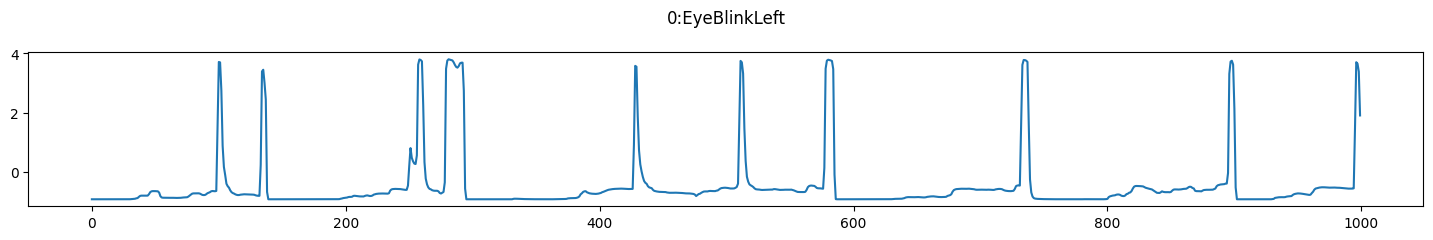

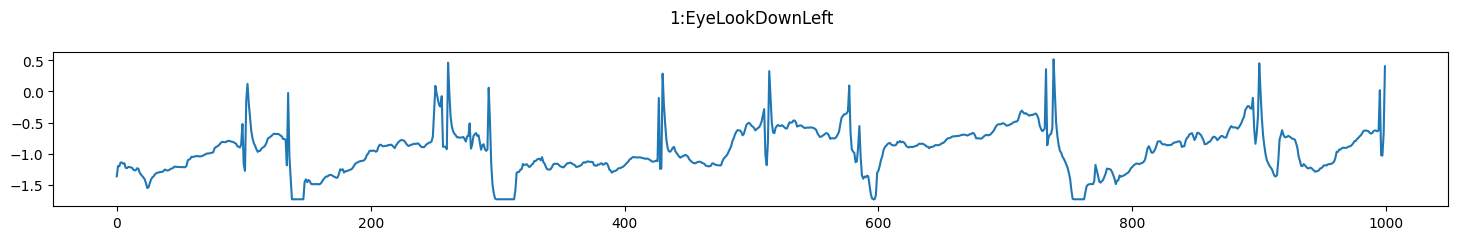

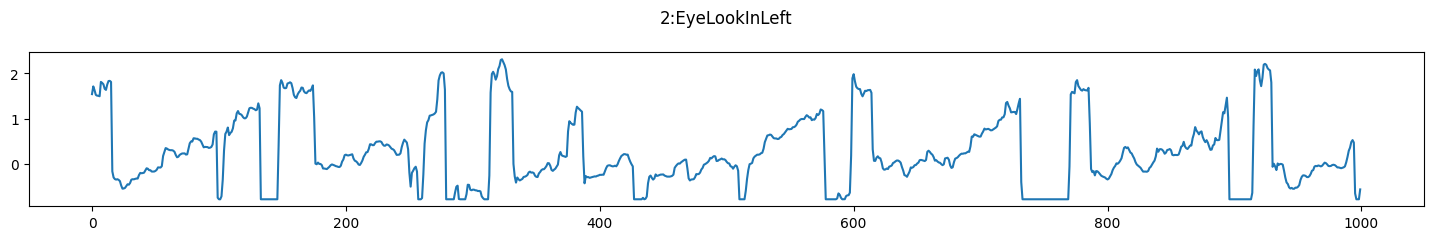

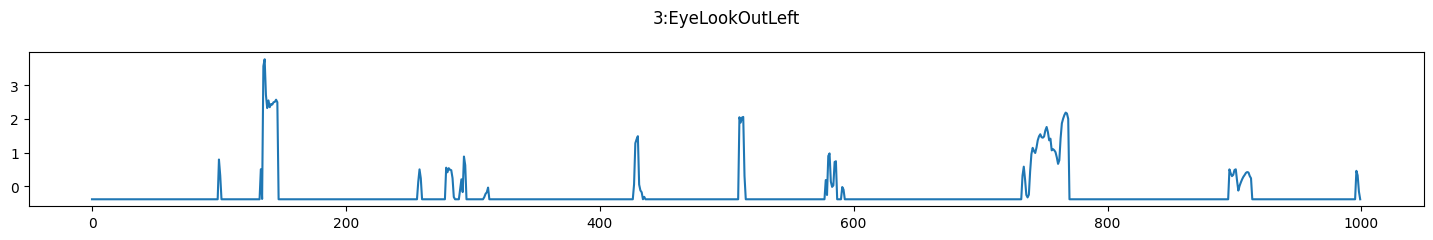

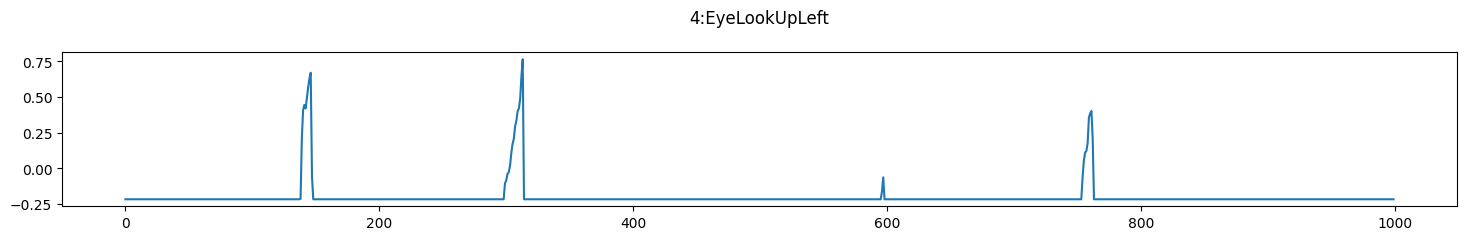

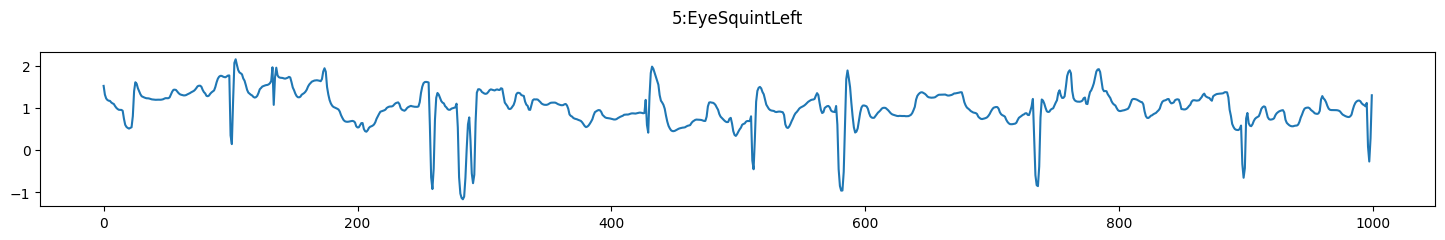

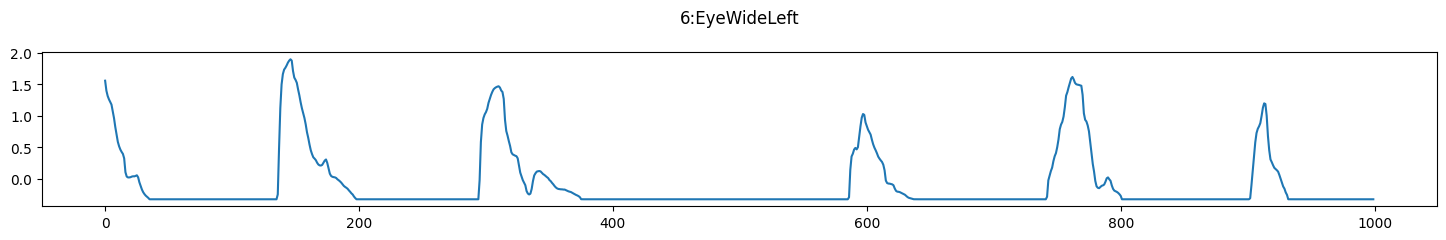

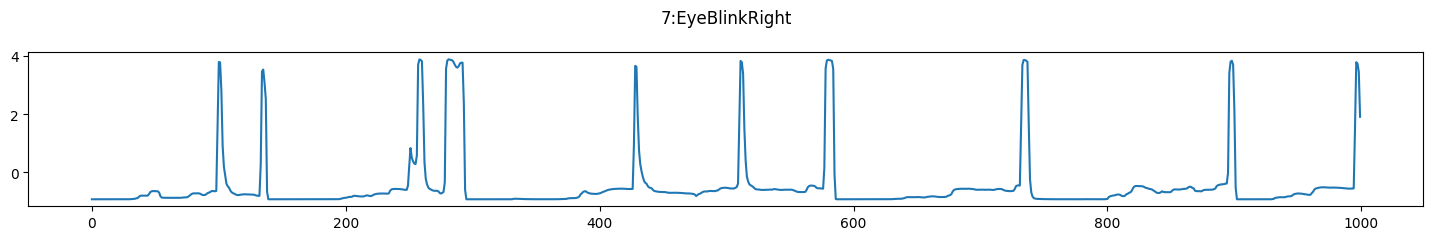

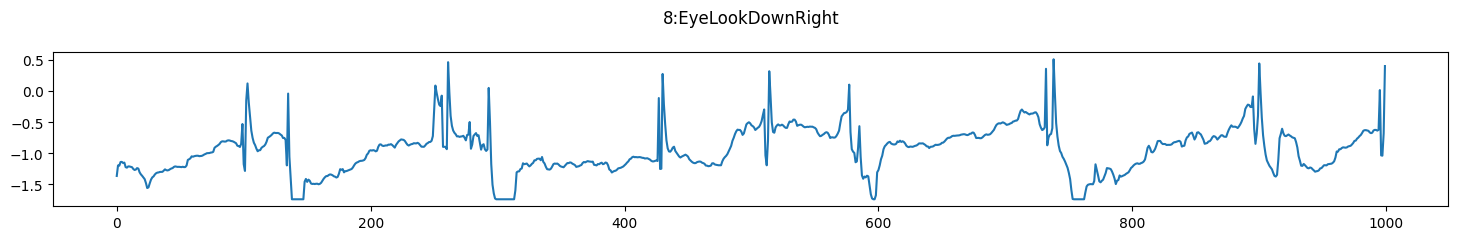

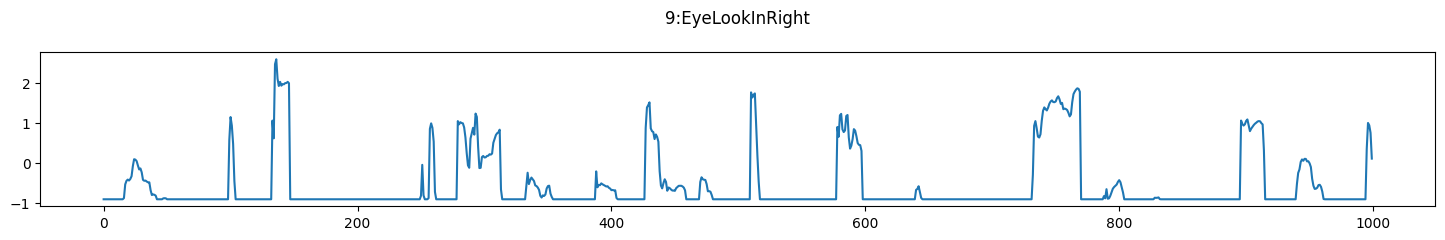

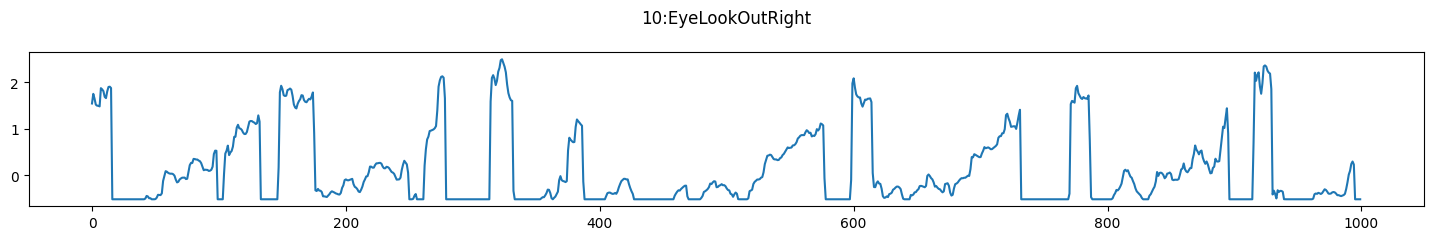

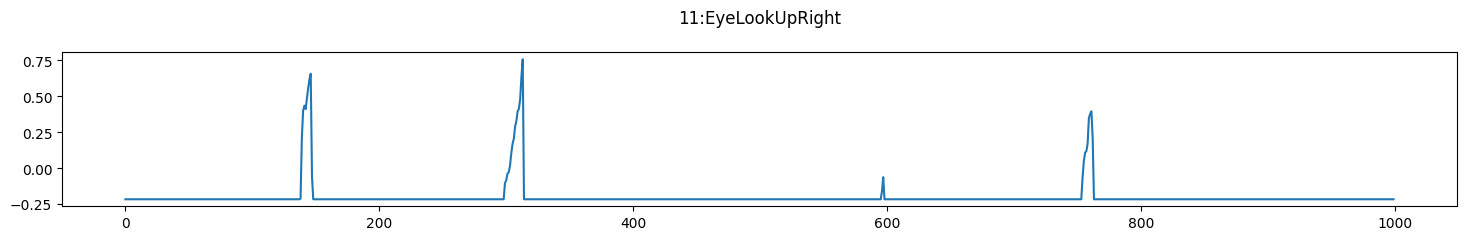

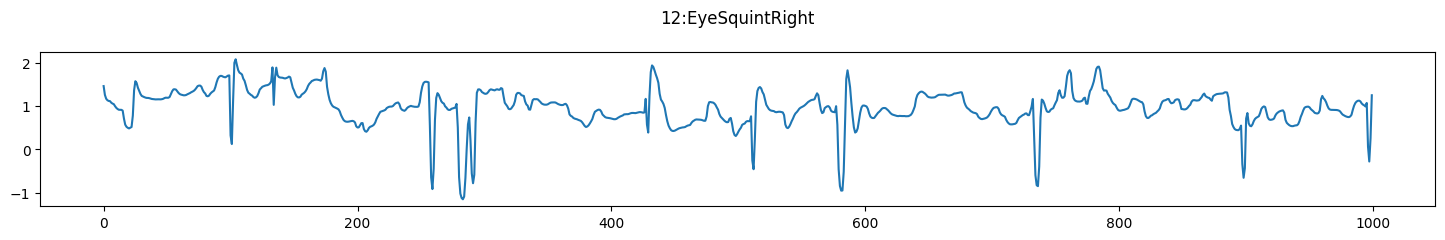

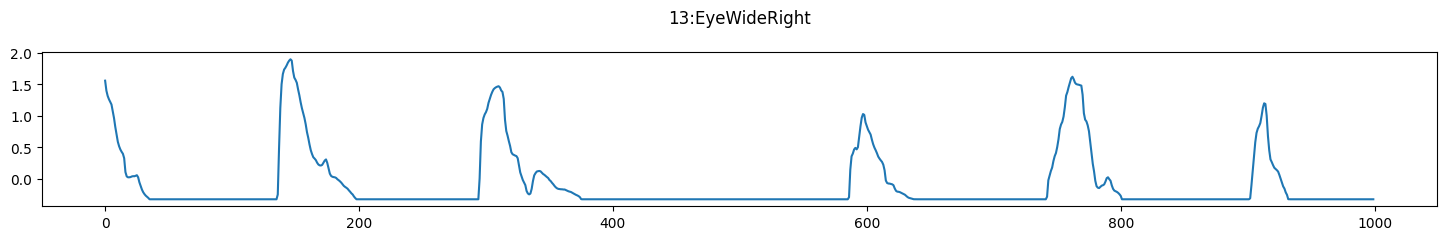

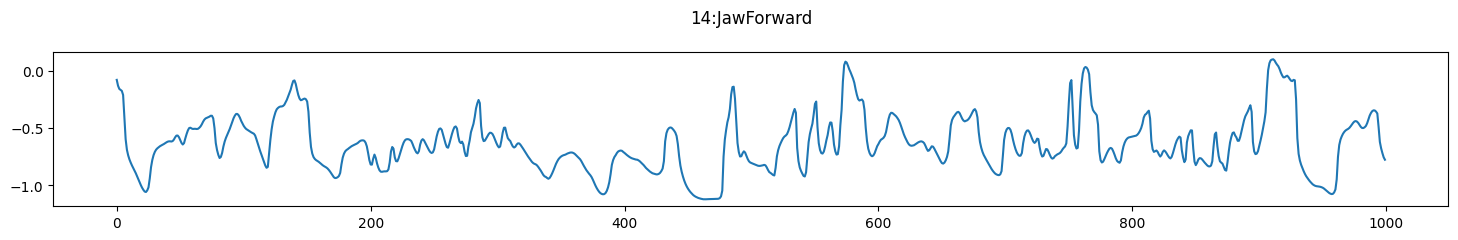

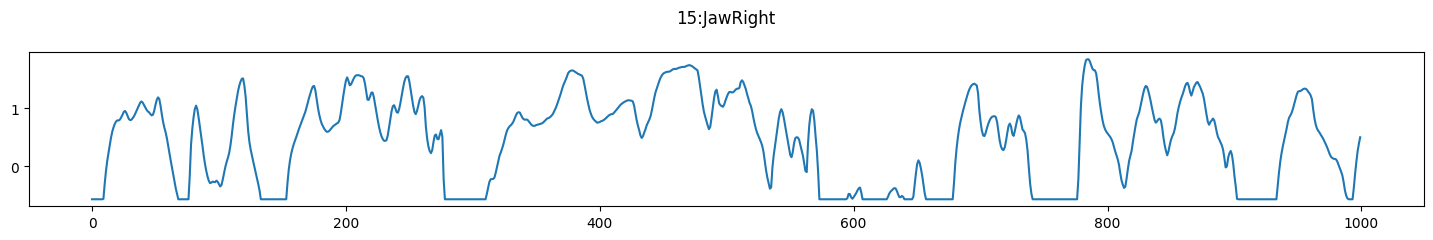

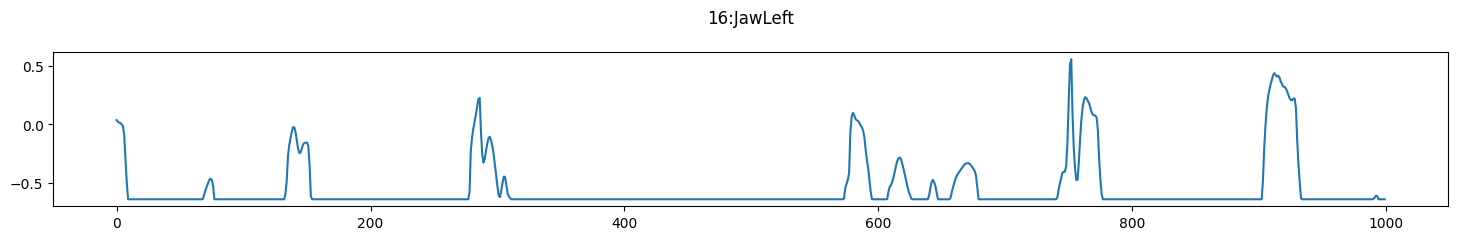

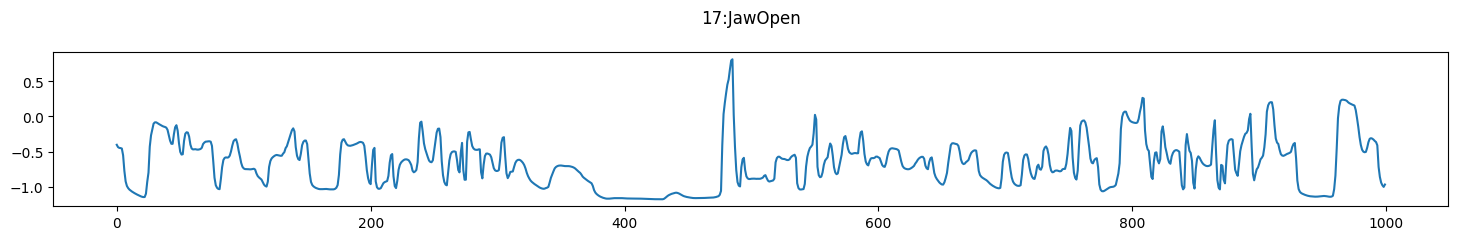

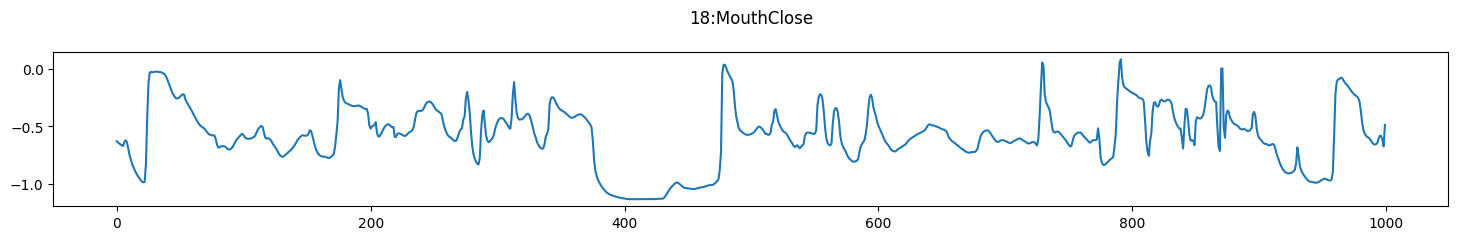

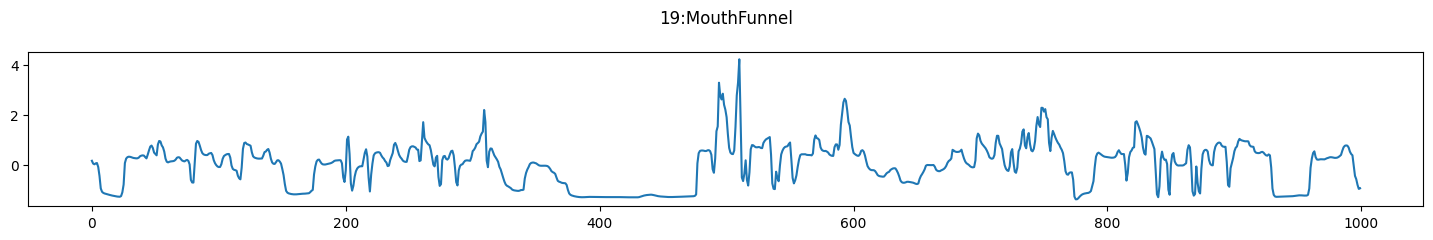

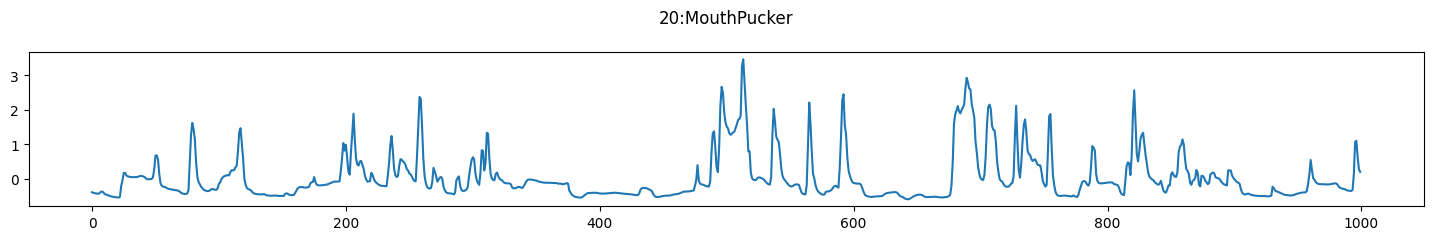

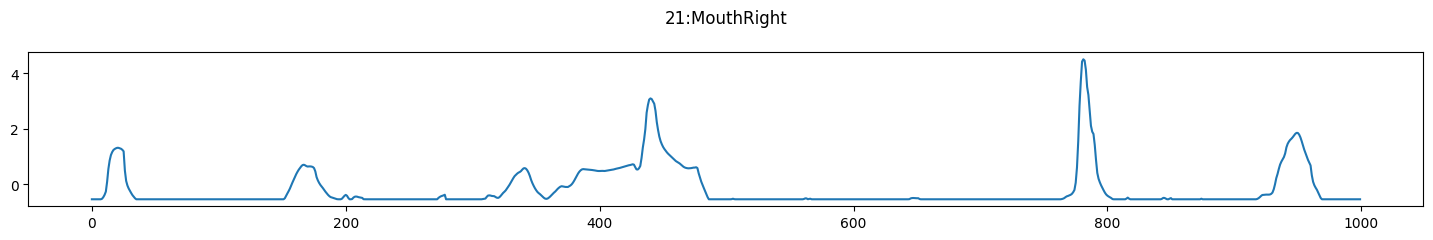

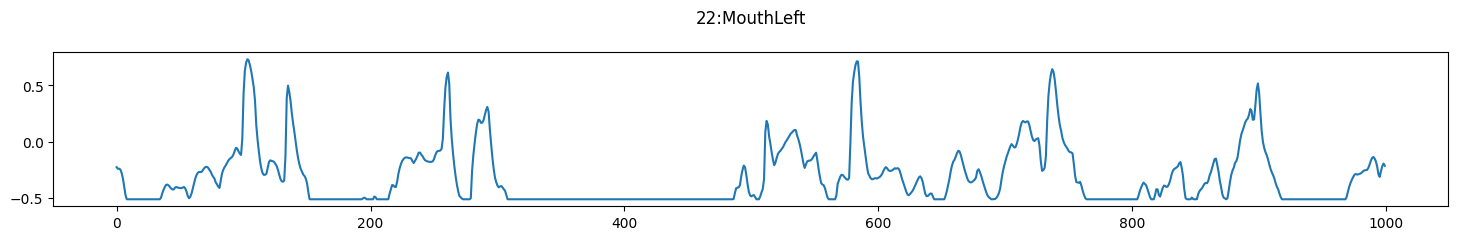

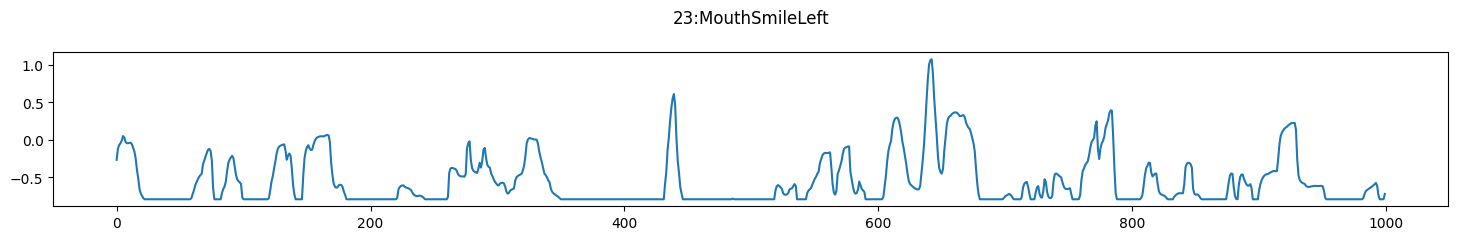

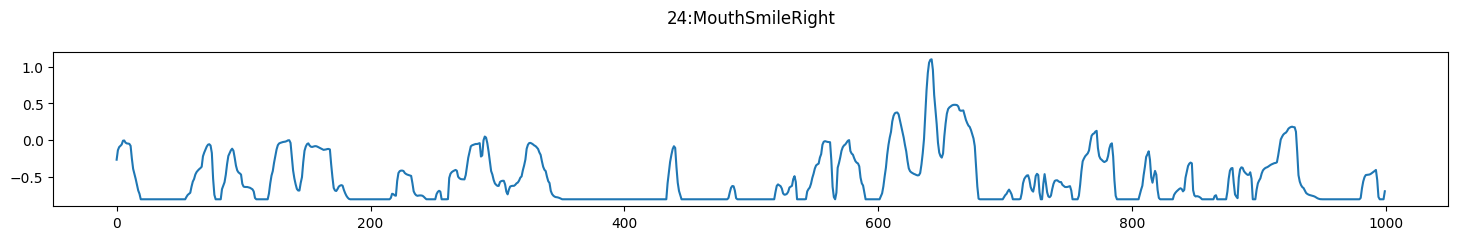

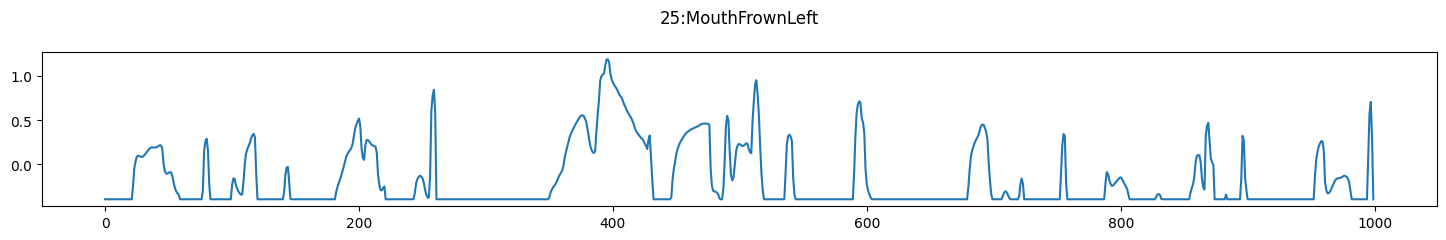

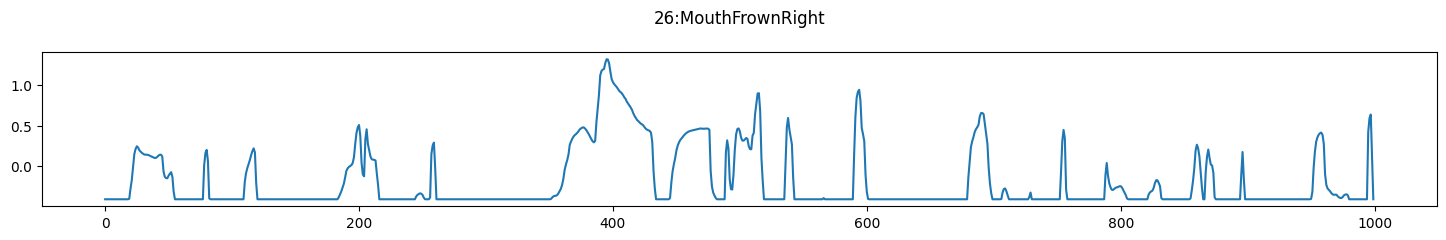

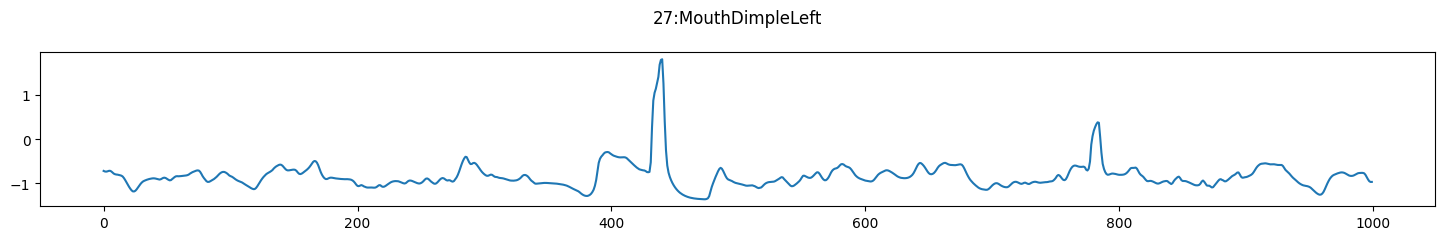

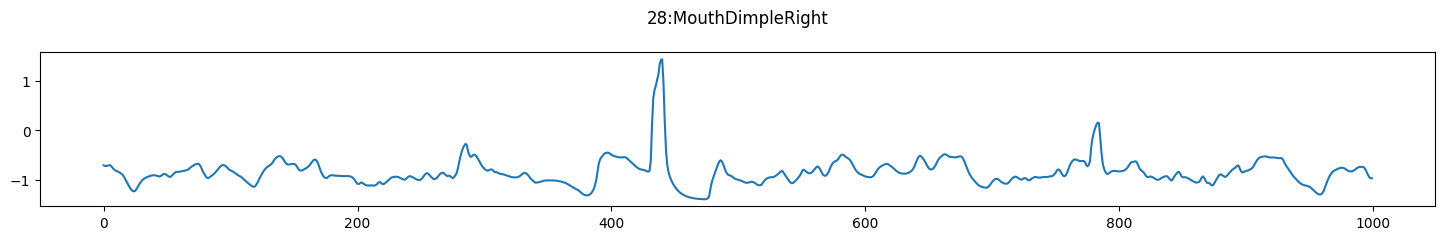

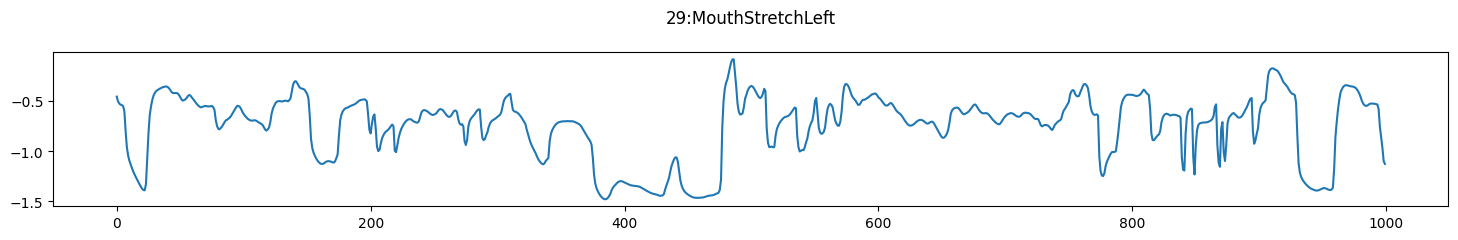

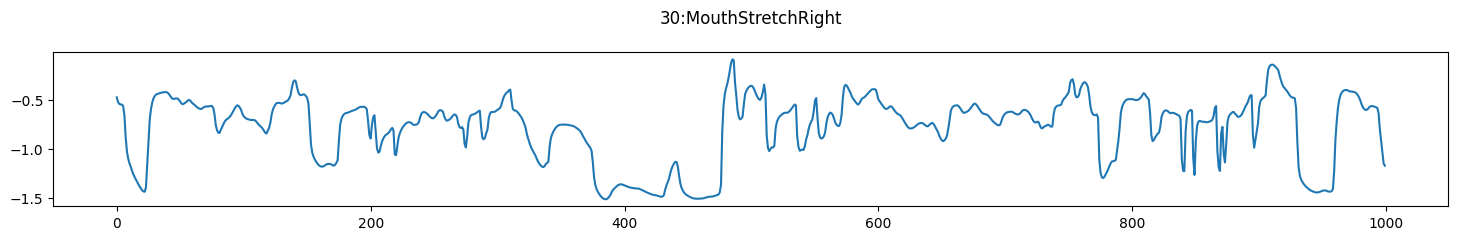

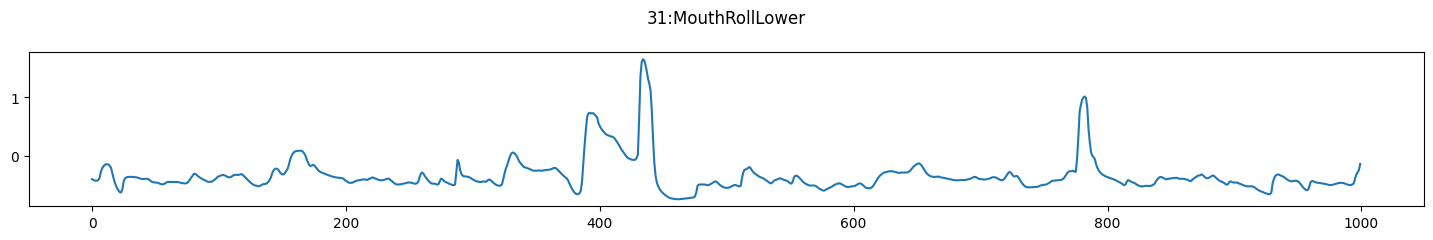

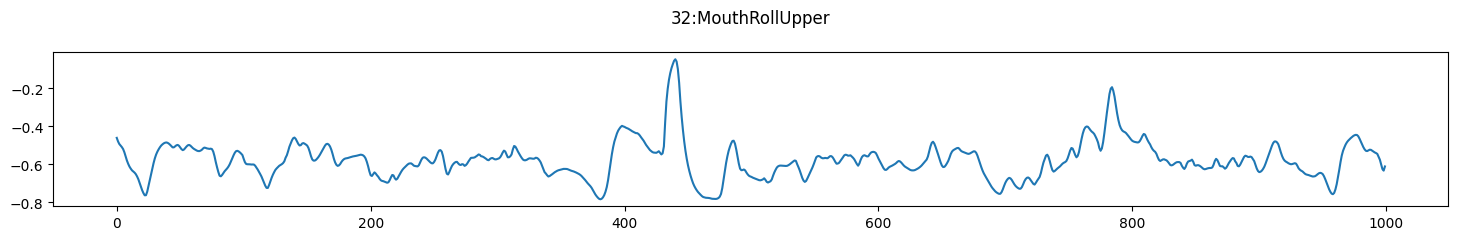

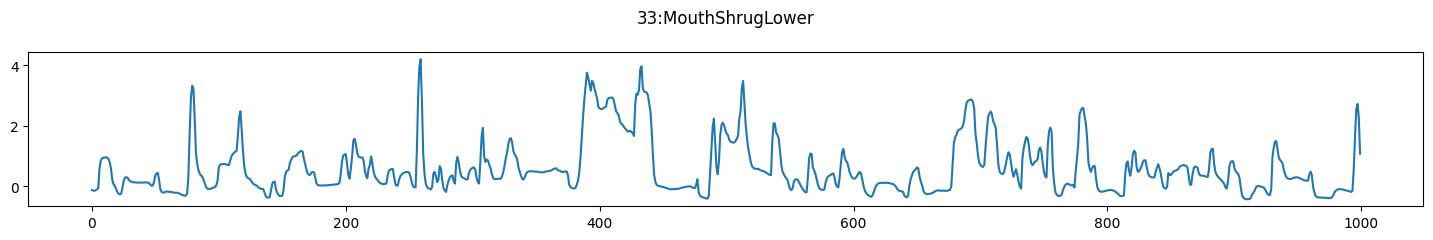

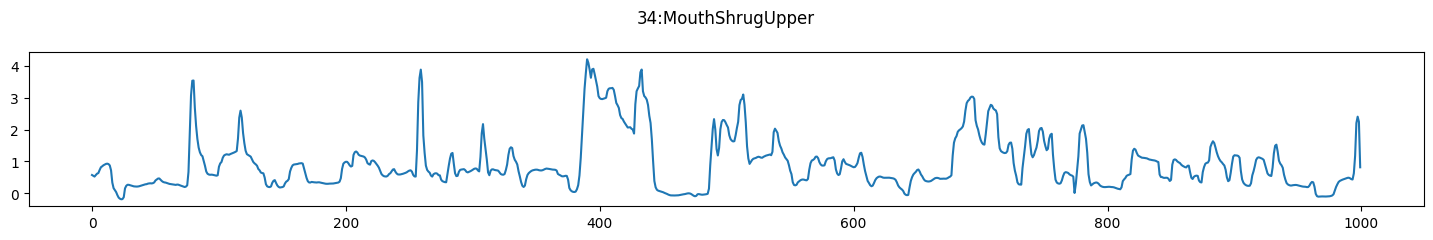

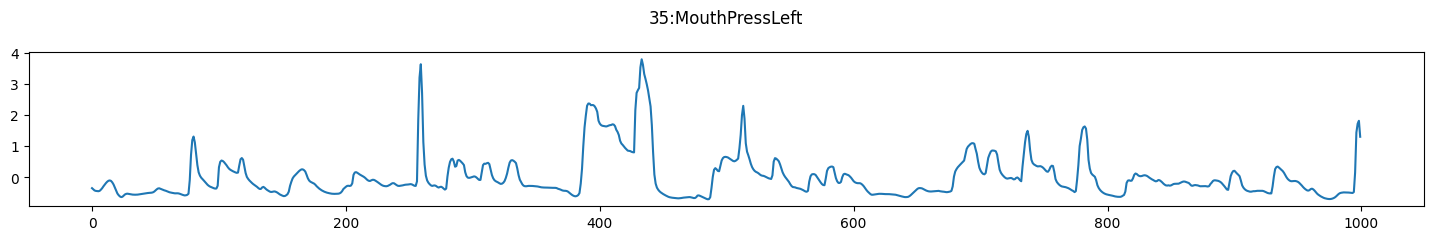

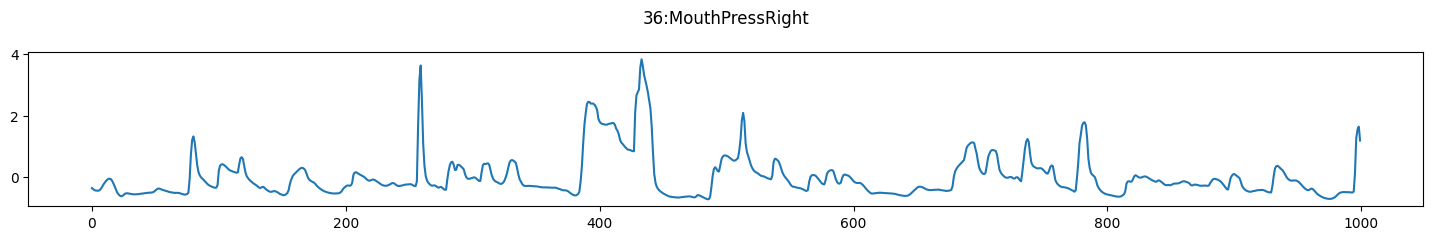

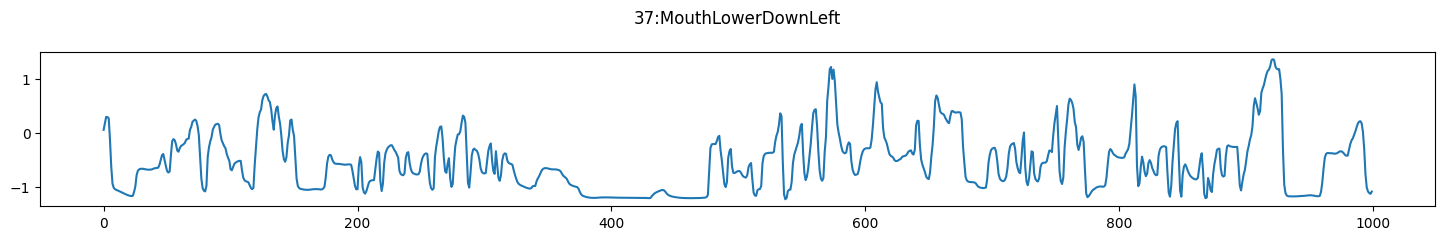

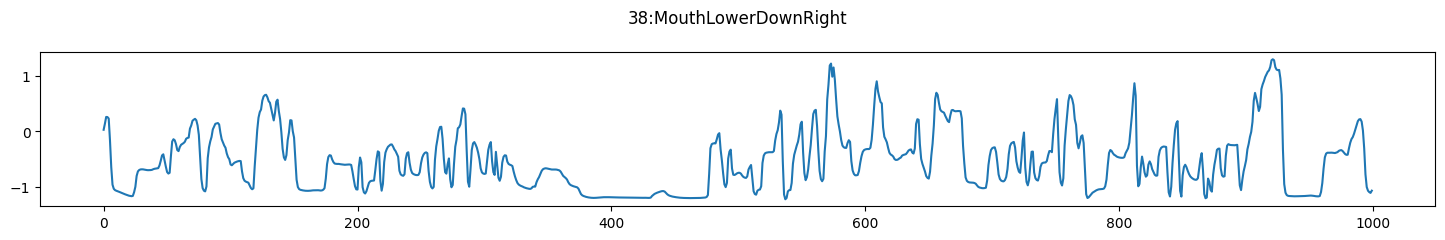

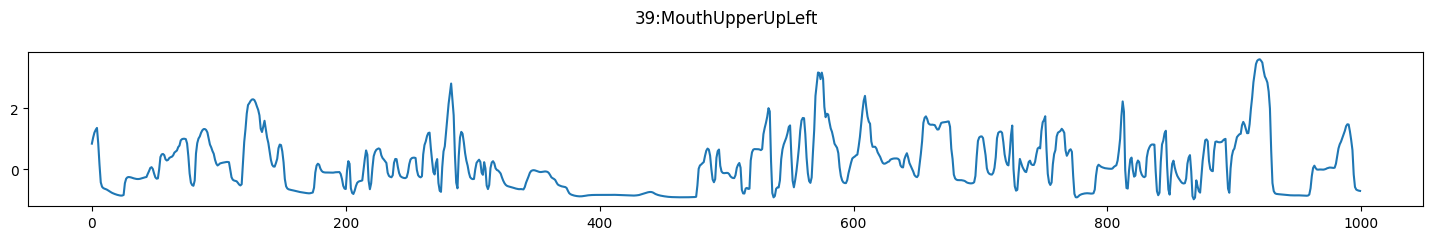

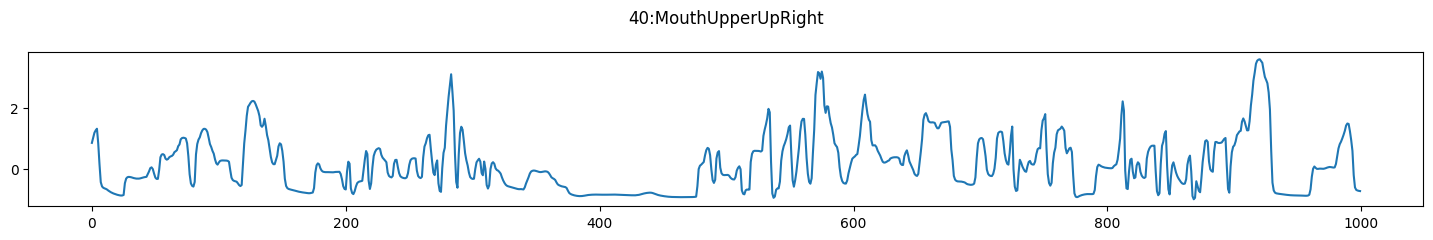

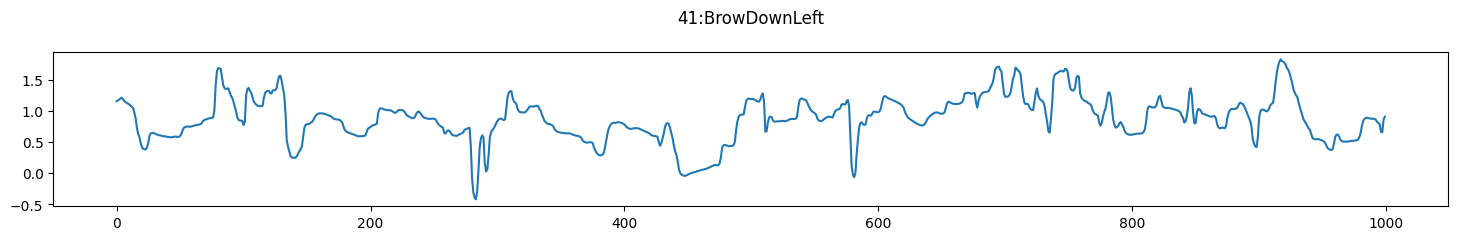

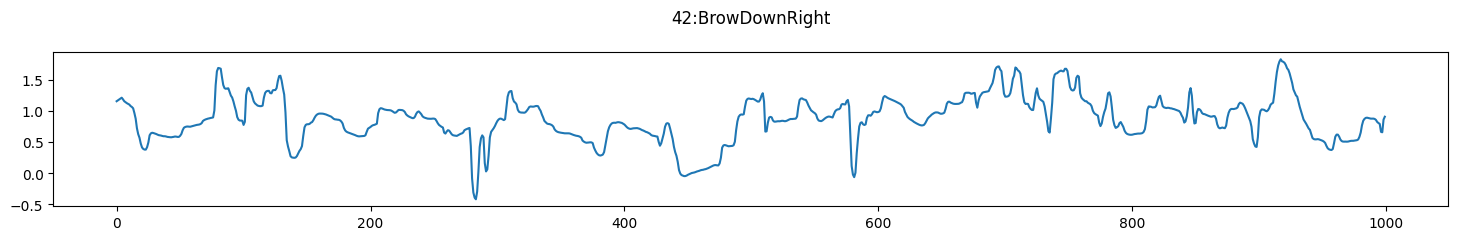

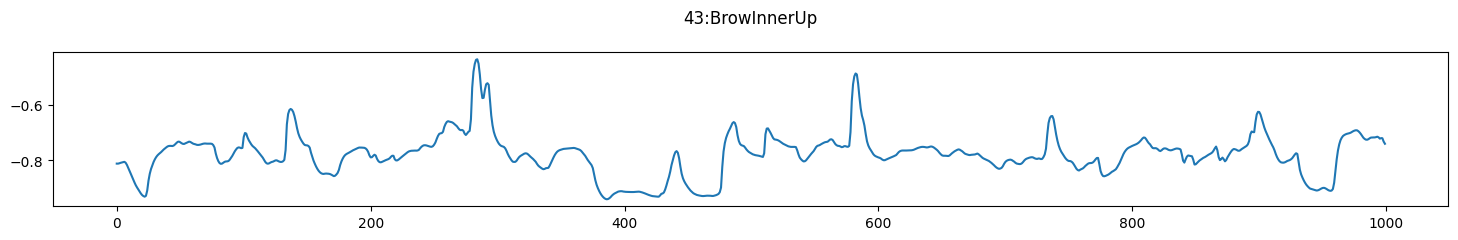

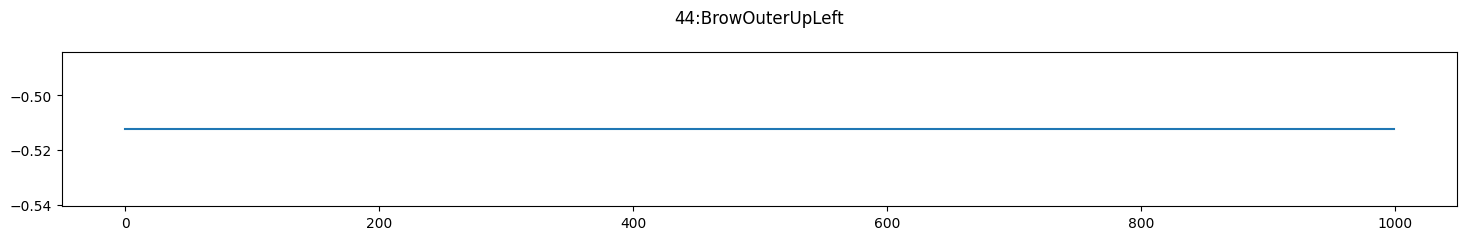

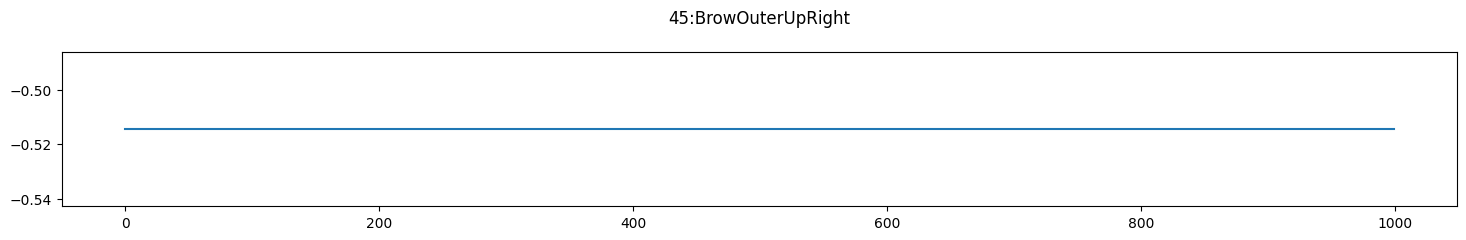

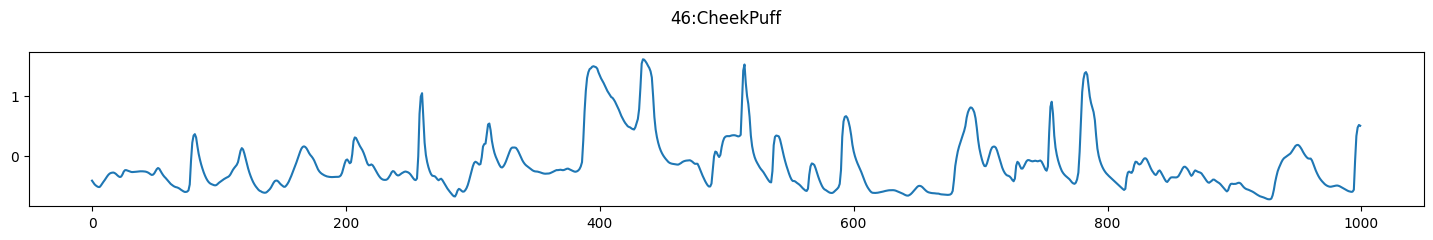

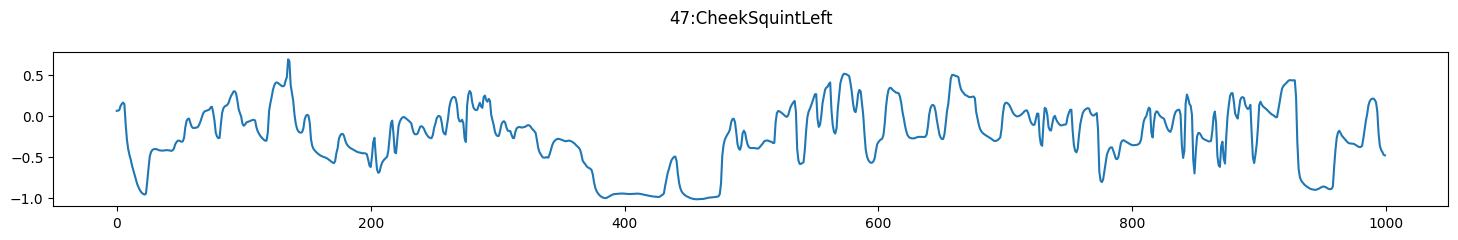

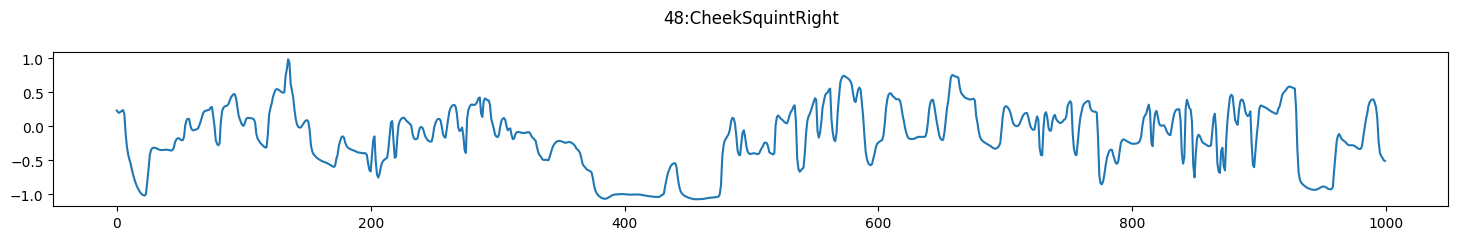

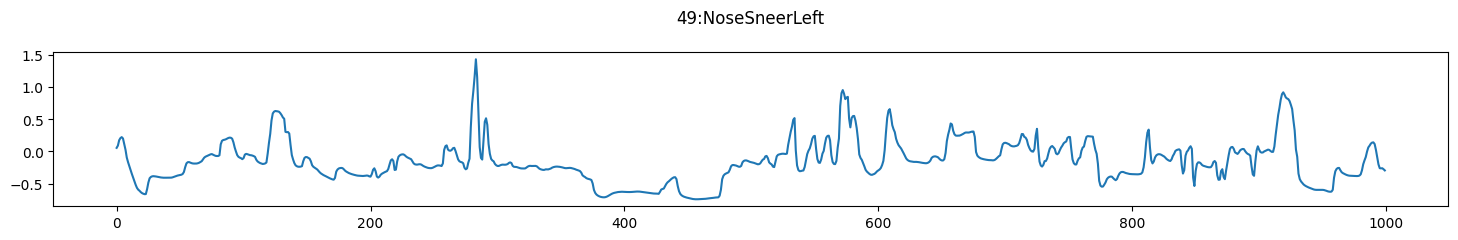

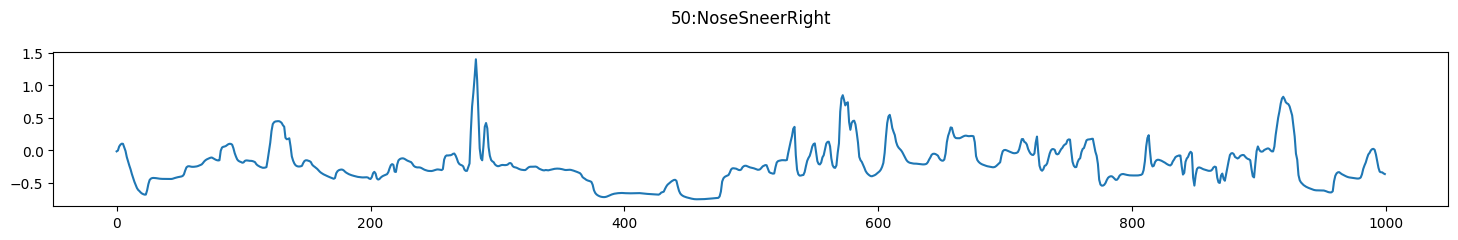

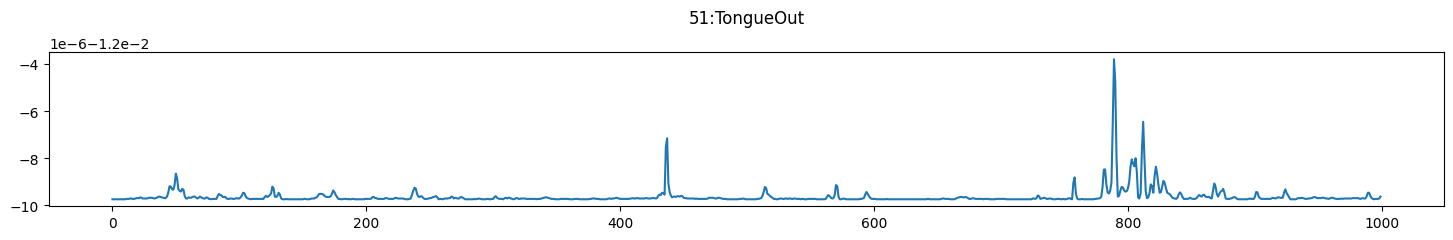

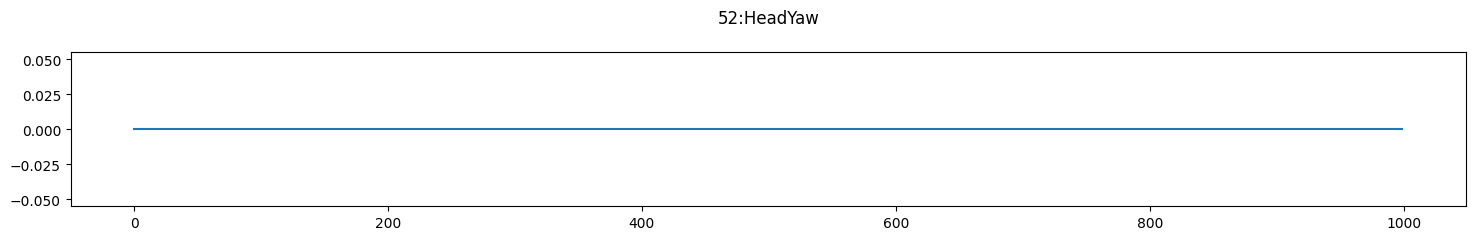

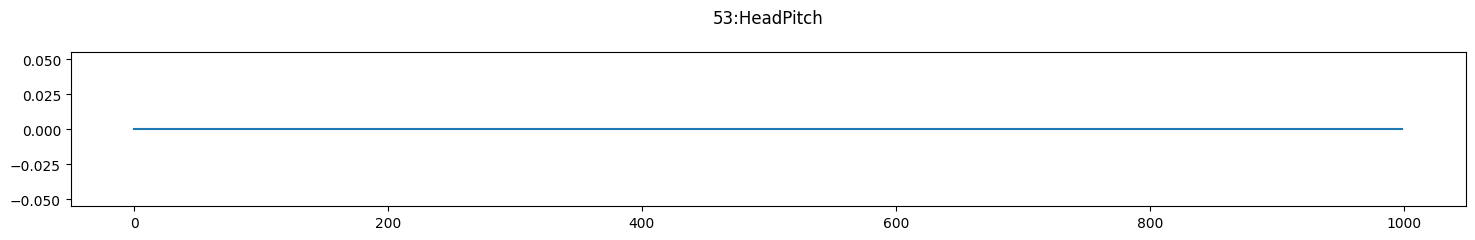

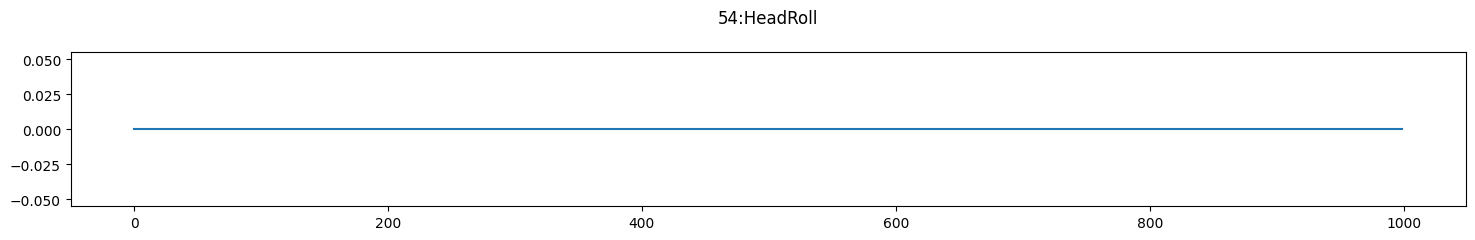

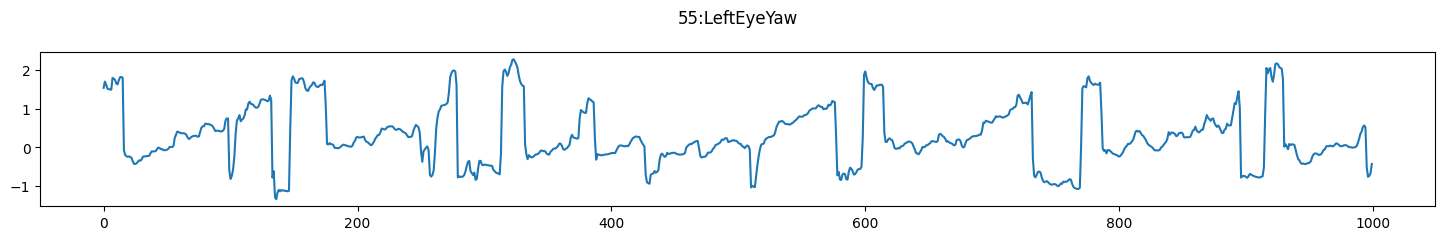

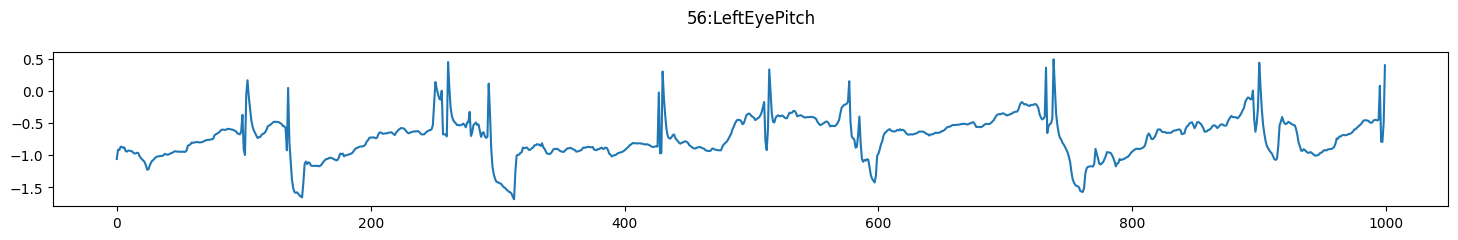

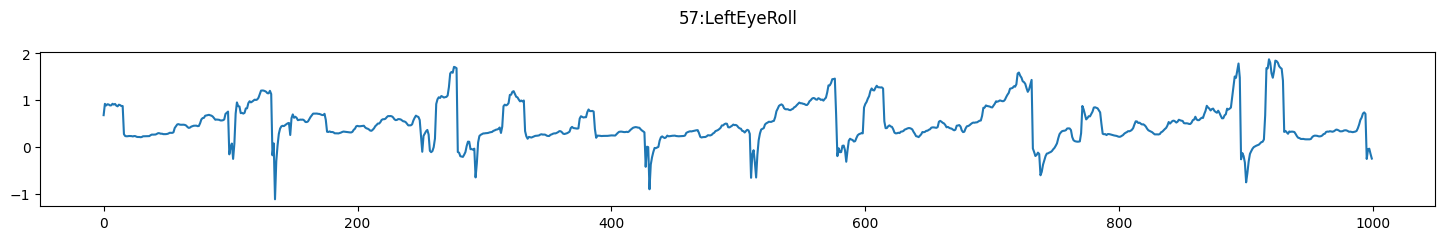

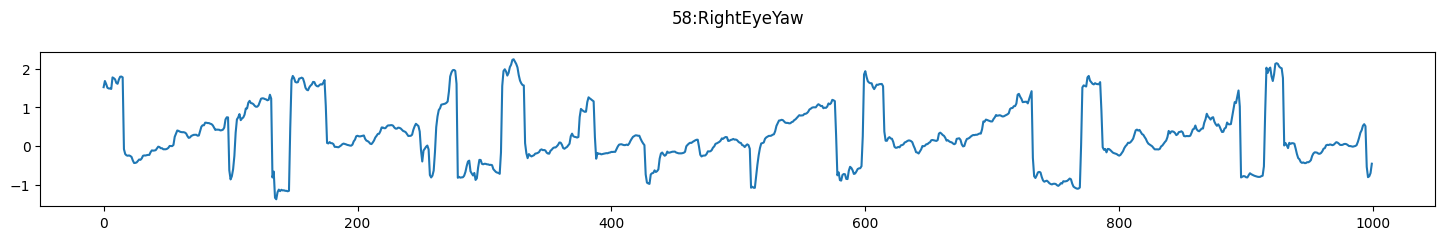

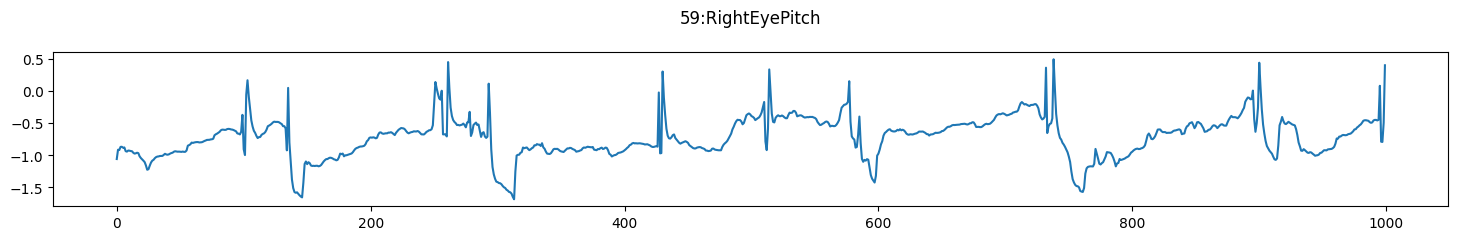

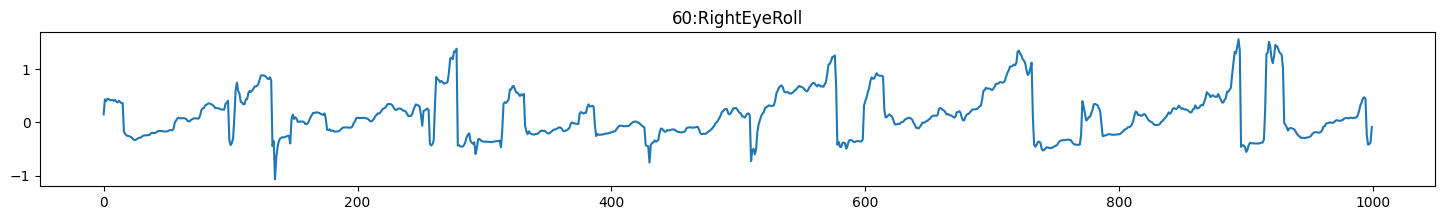

In [13]:
for i in range(61):
    plt.figure(figsize=[18, 2])
    plt.title(str(i) + ':' + arkit_names[i])
    plt.plot(blendshapes_norm[1000:2000, i])
    plt.show()


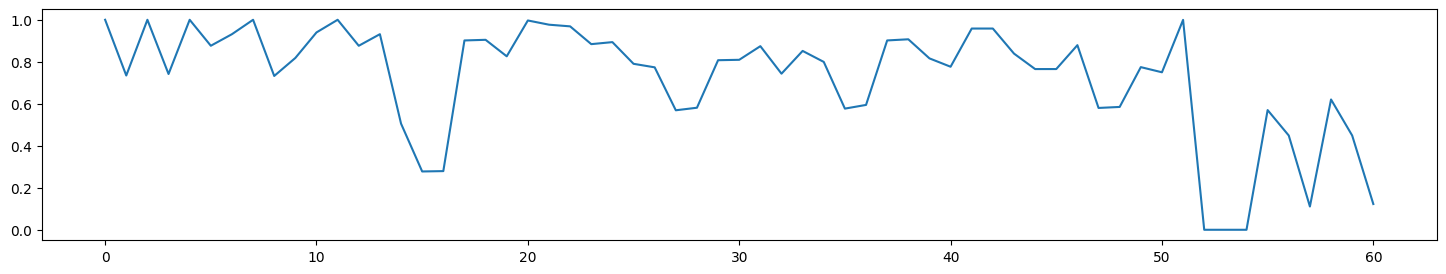

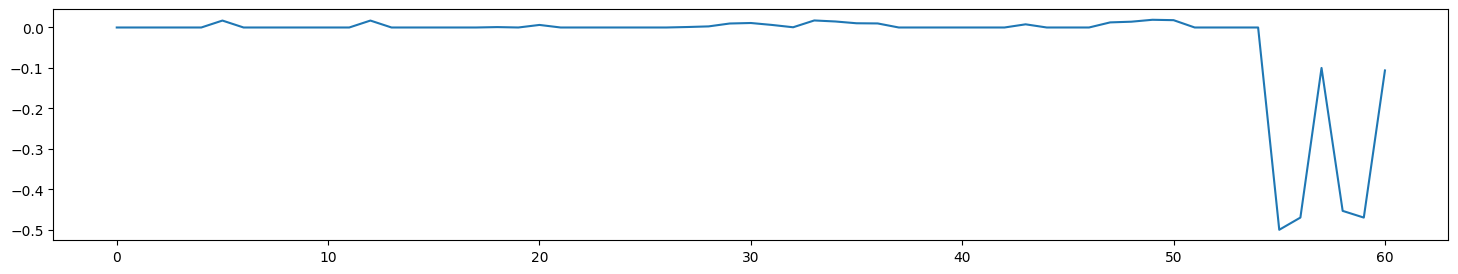

In [9]:
max = blendshapes.max(axis=0)
min = blendshapes.min(axis=0)

import matplotlib.pyplot as plt

plt.figure(figsize=[18, 3])
plt.plot(max)
plt.show()

plt.figure(figsize=[18, 3])
plt.plot(min)
plt.show()

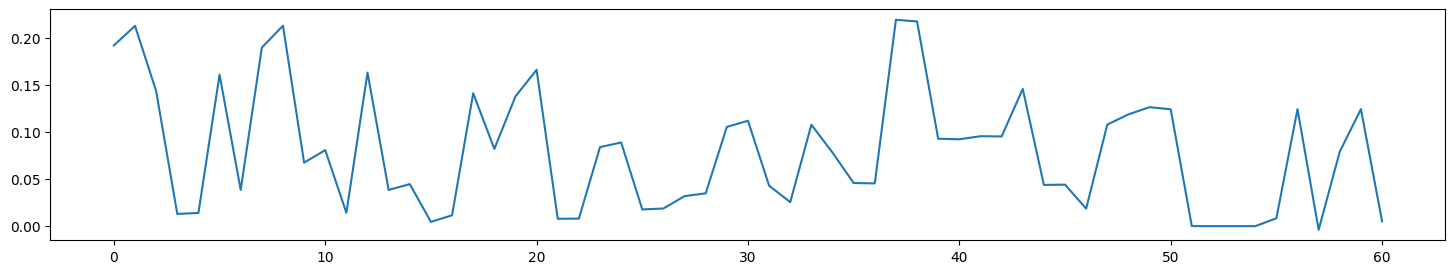

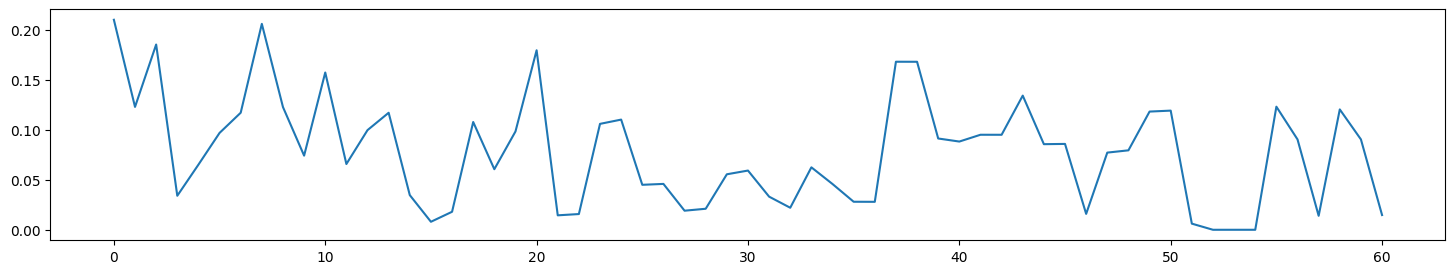

In [4]:
mean = blendshapes.mean(axis=0)
std = blendshapes.std(axis=0)

import matplotlib.pyplot as plt

plt.figure(figsize=[18, 3])
plt.plot(mean)
plt.show()

plt.figure(figsize=[18, 3])
plt.plot(std)
plt.show()

In [5]:
from data.statistics import mean, std

blendshapes_norm = (blendshapes - mean[None :]) / std[None, :]
print(blendshapes_norm.shape)

(749424, 61)


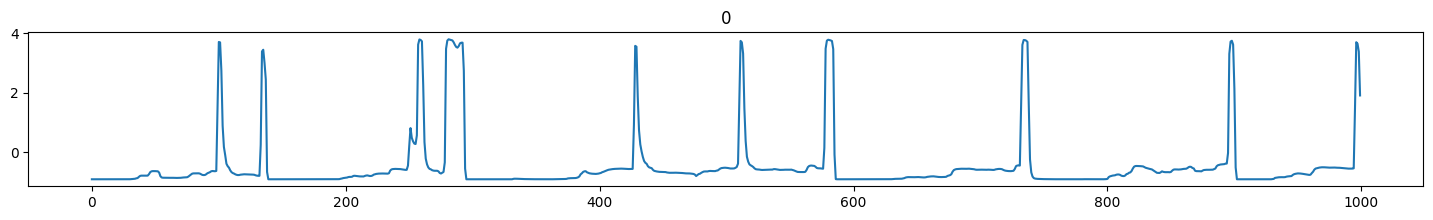

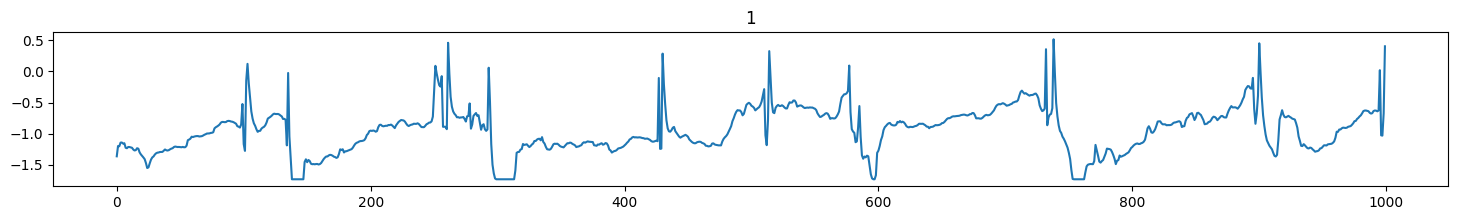

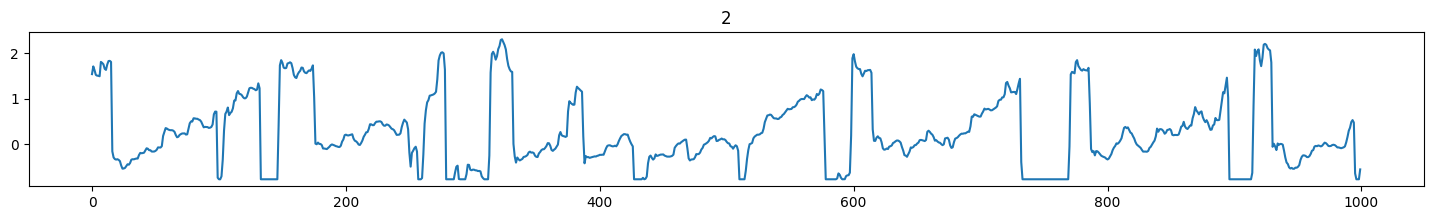

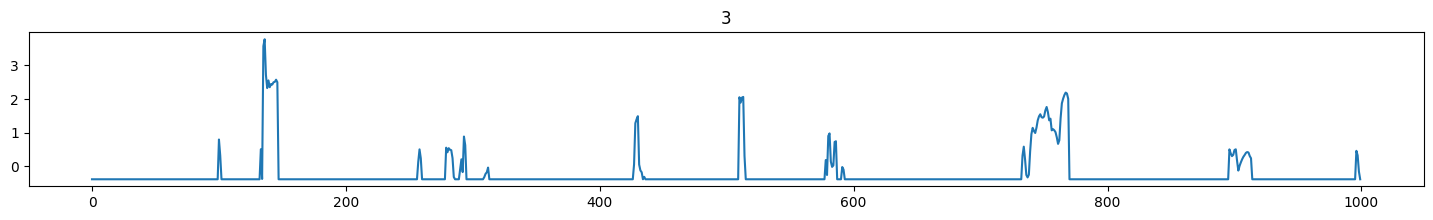

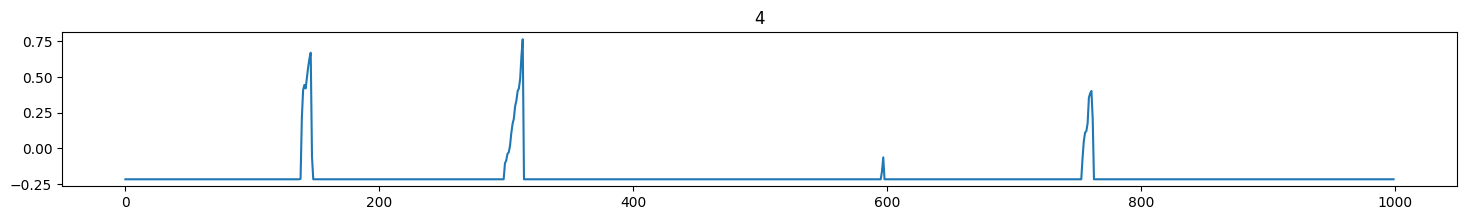

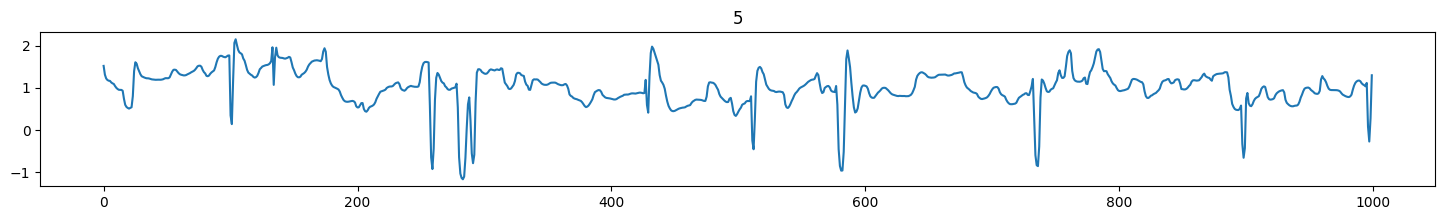

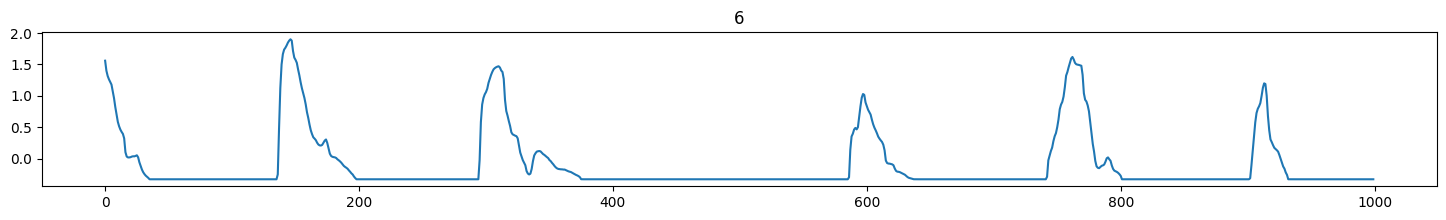

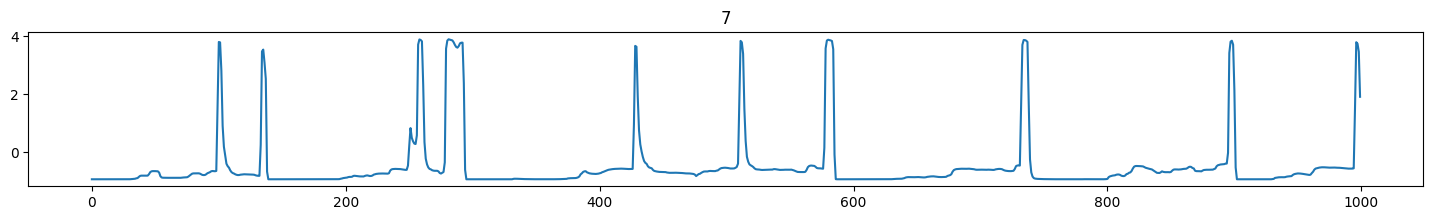

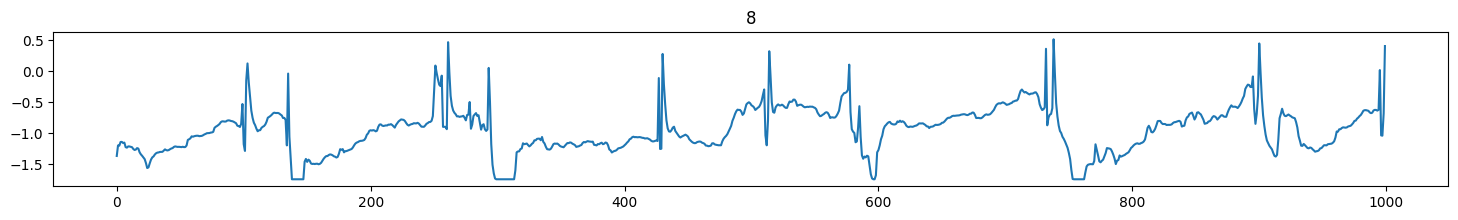

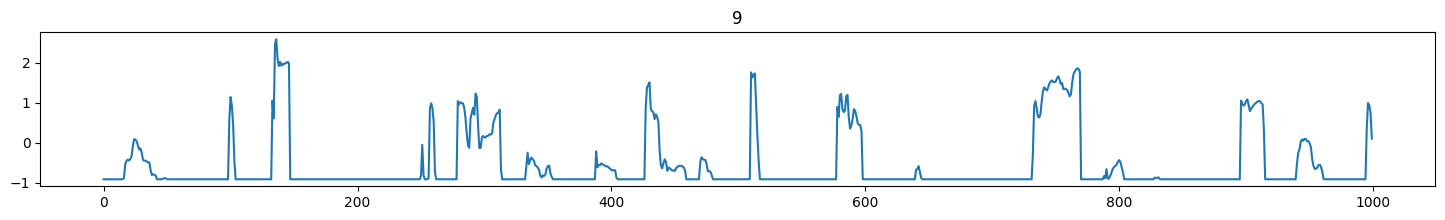

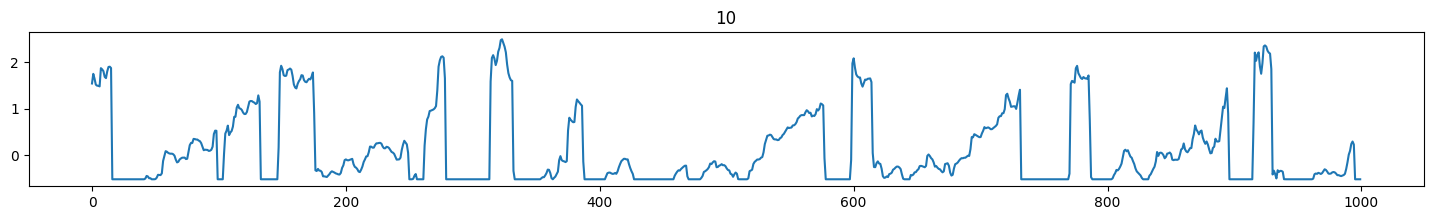

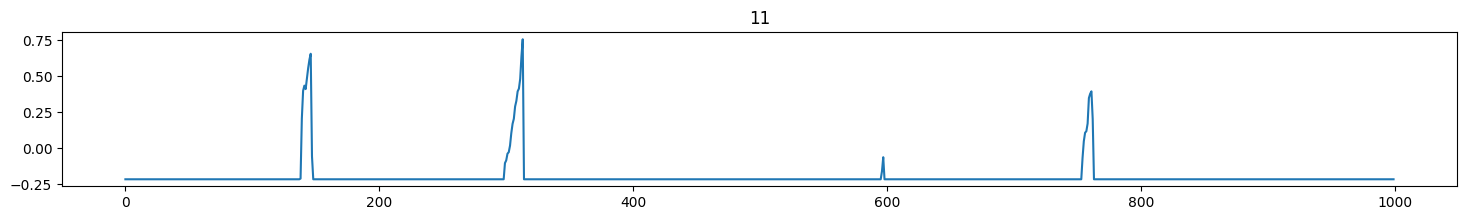

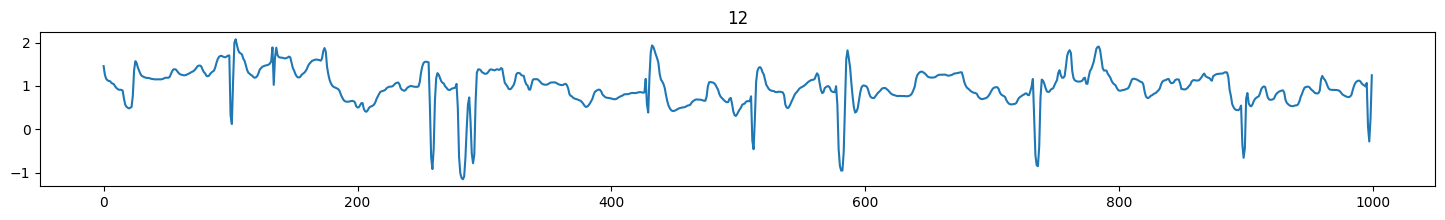

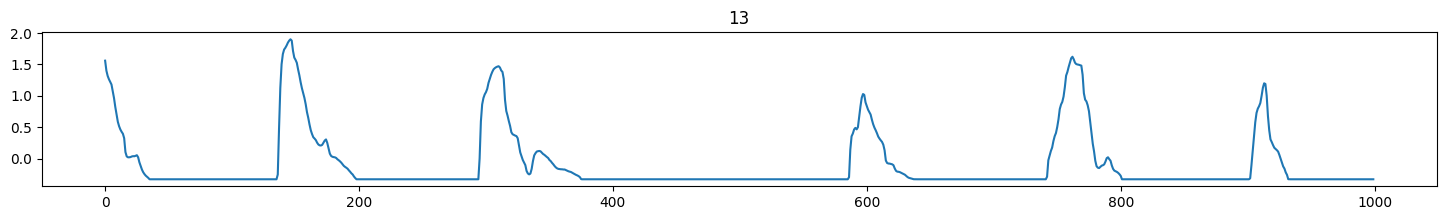

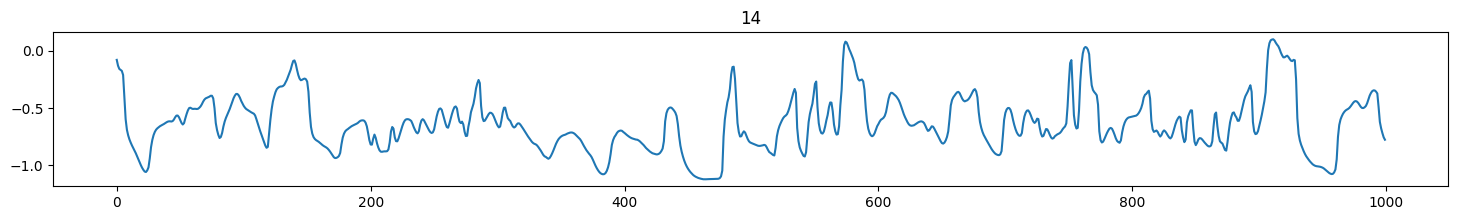

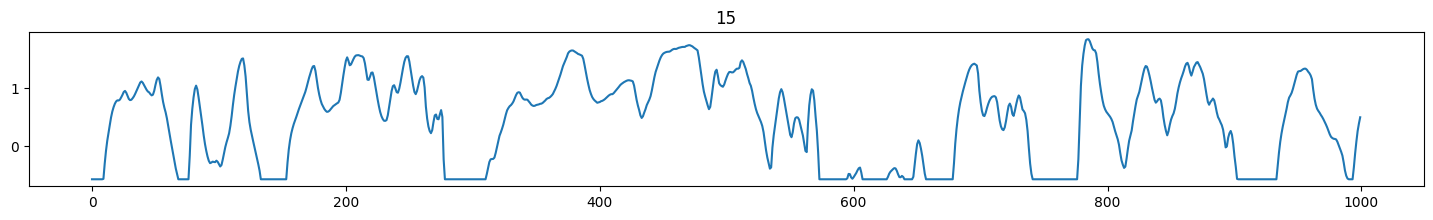

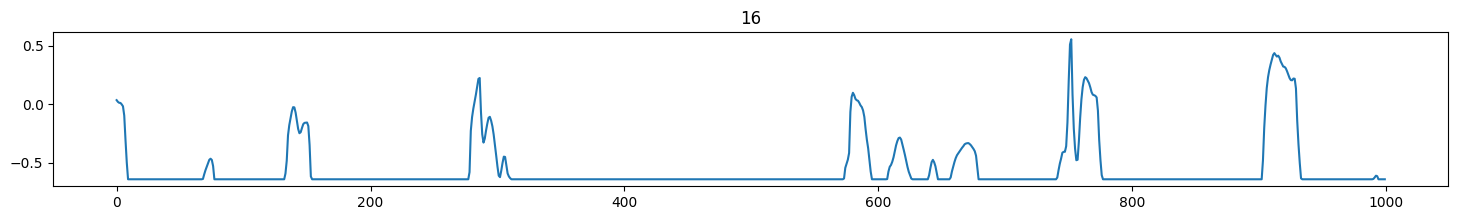

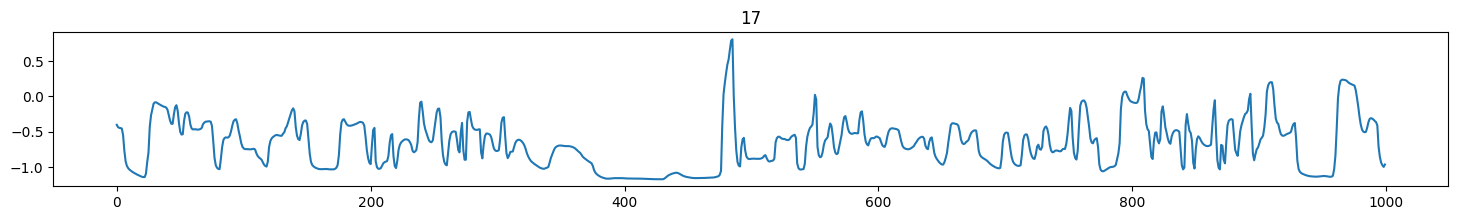

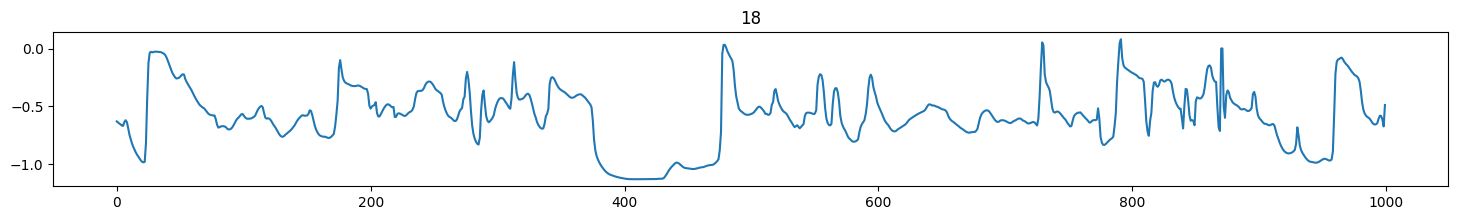

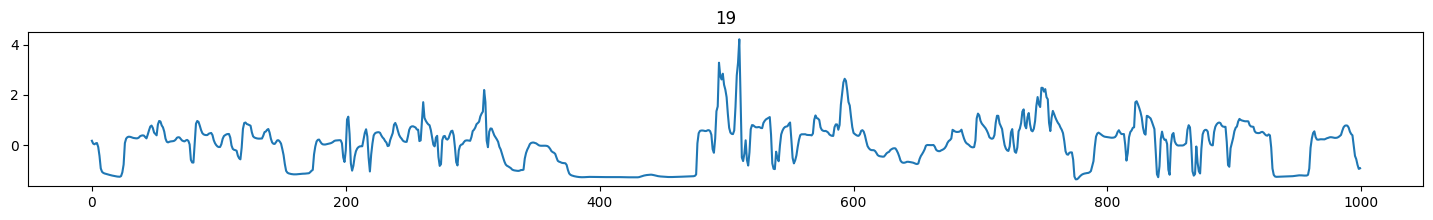

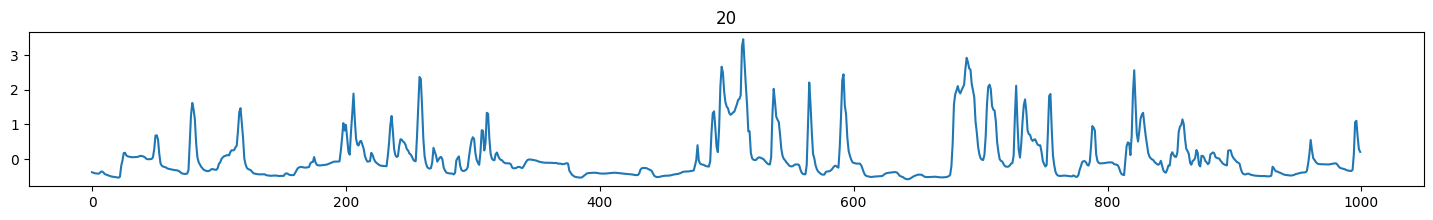

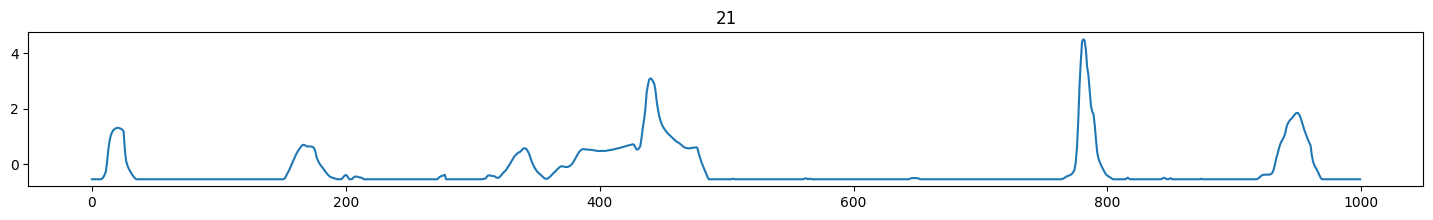

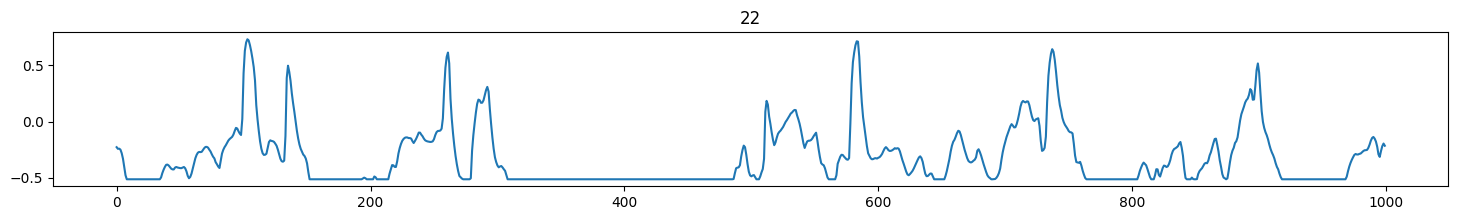

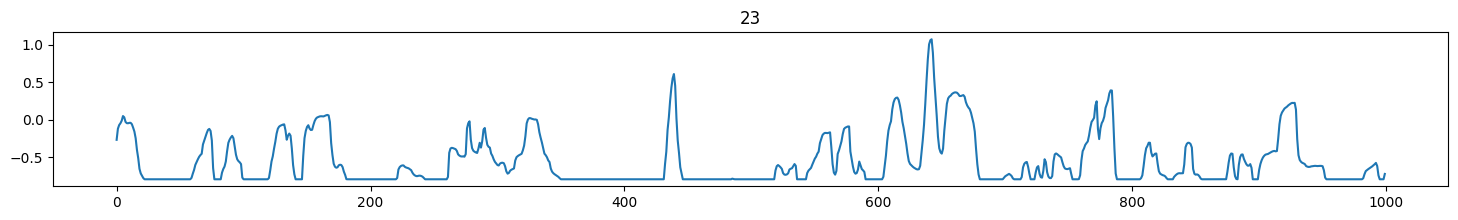

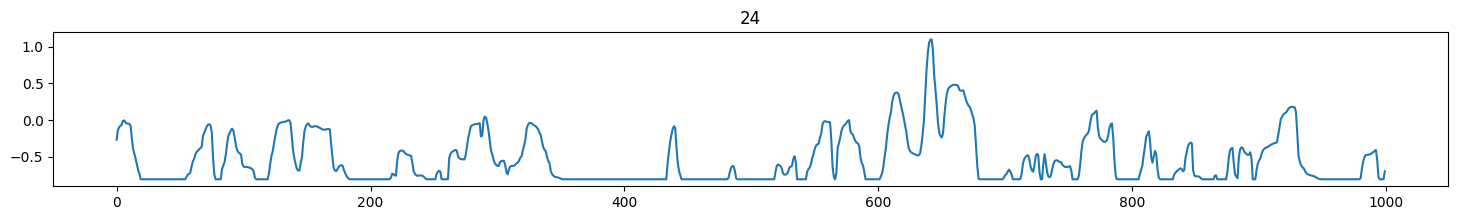

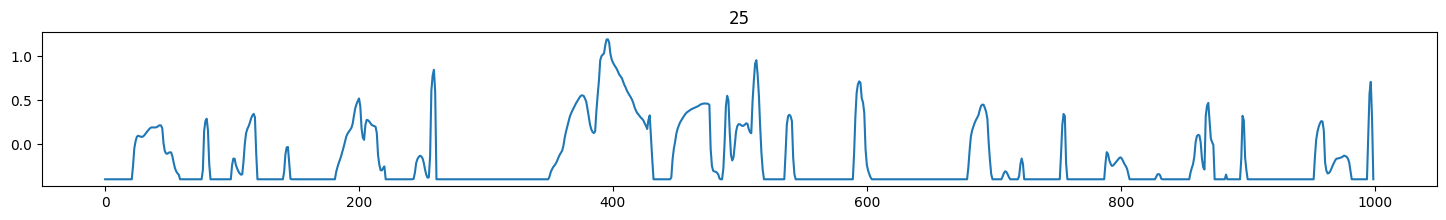

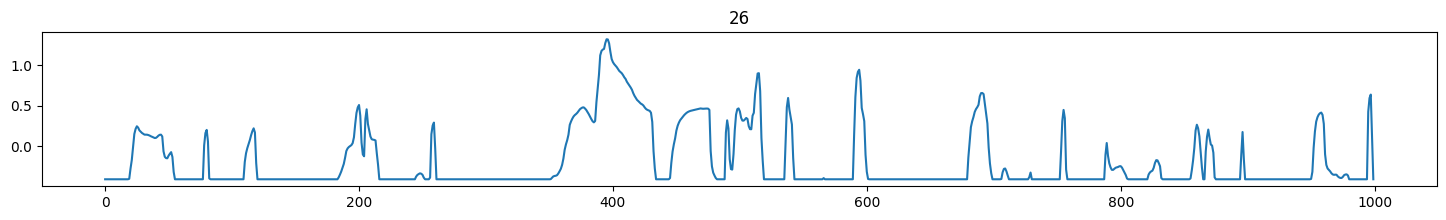

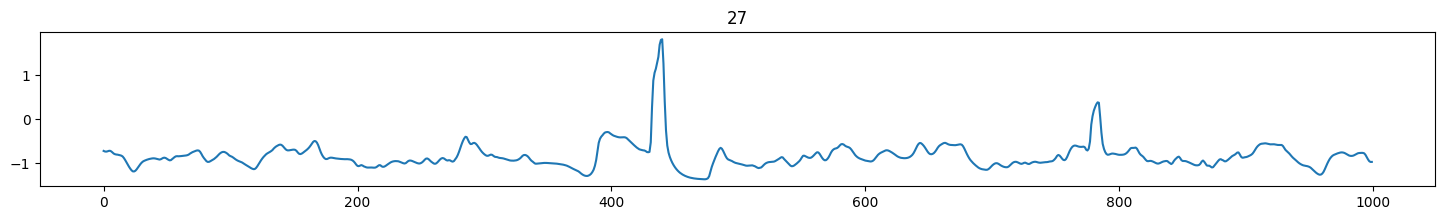

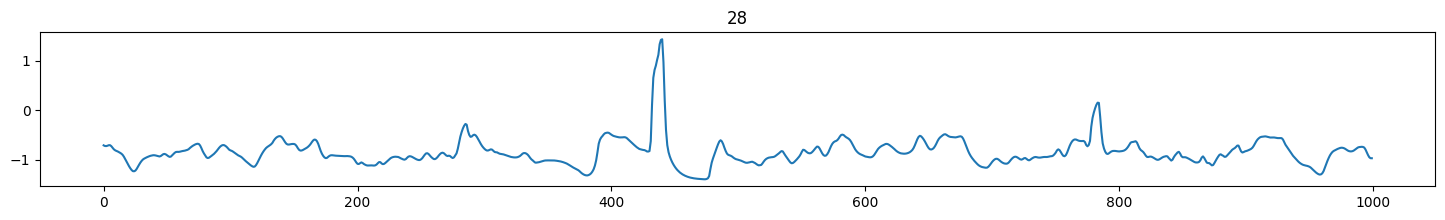

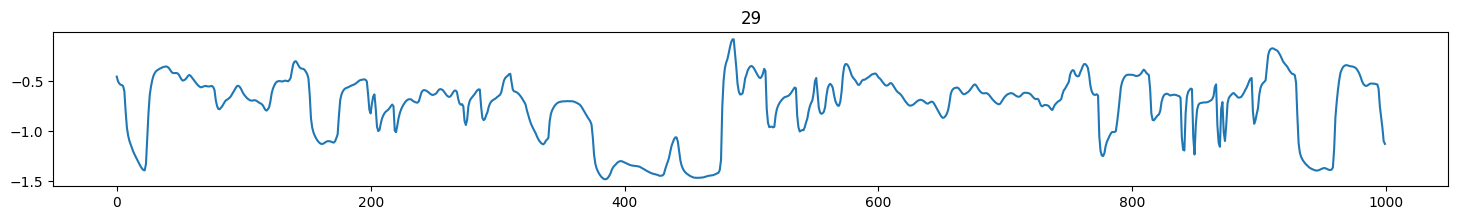

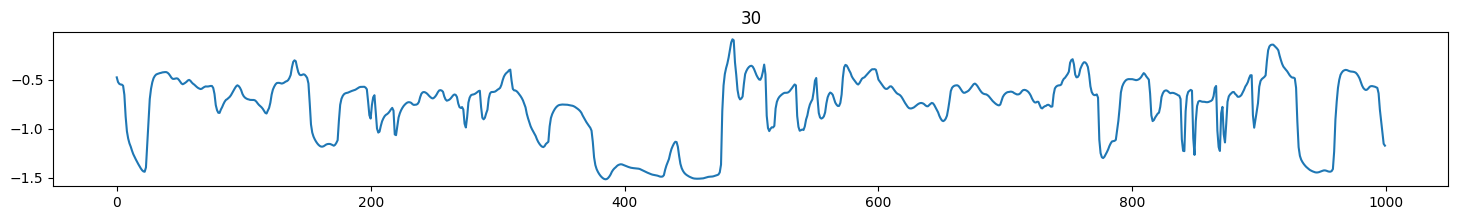

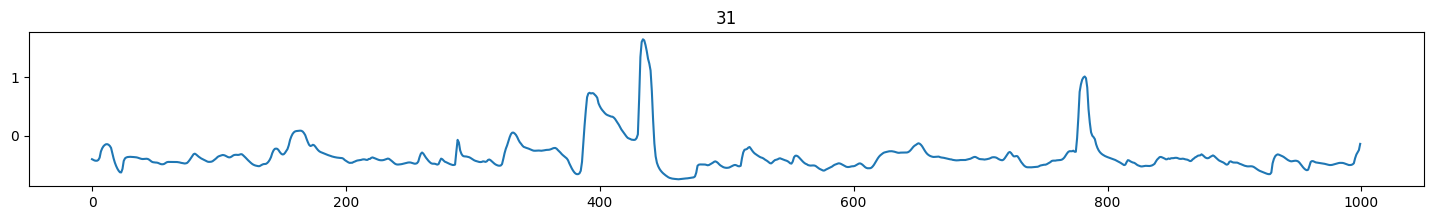

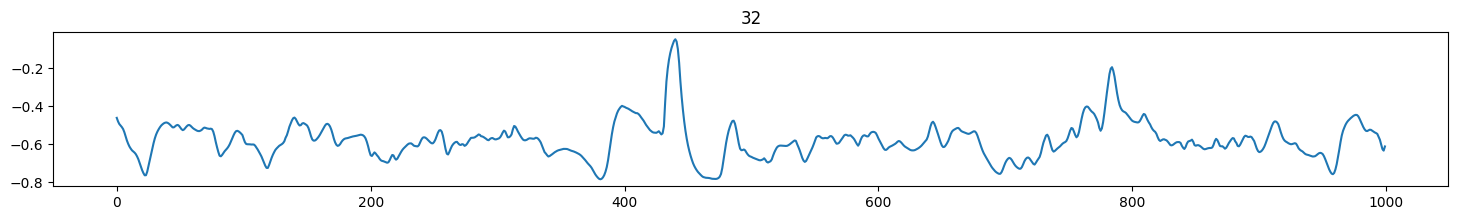

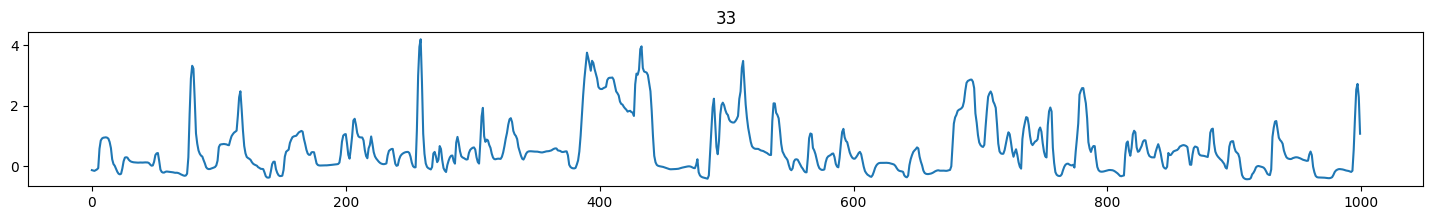

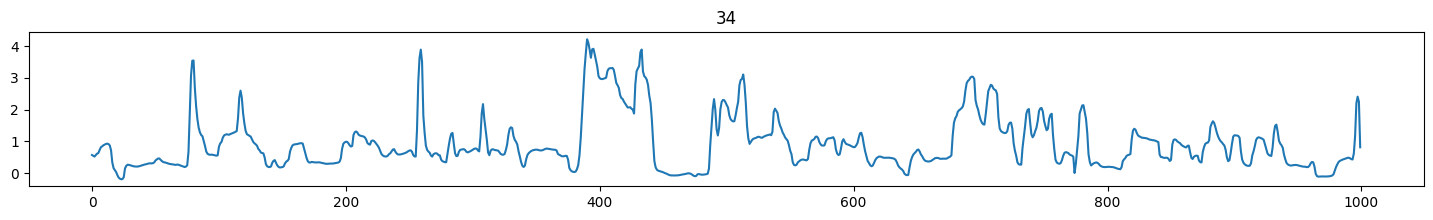

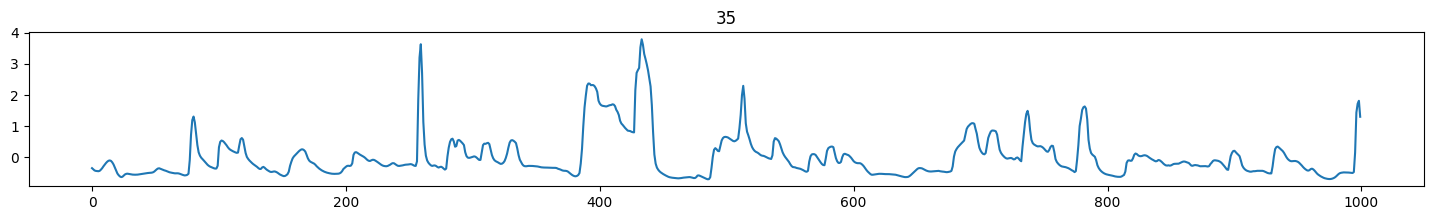

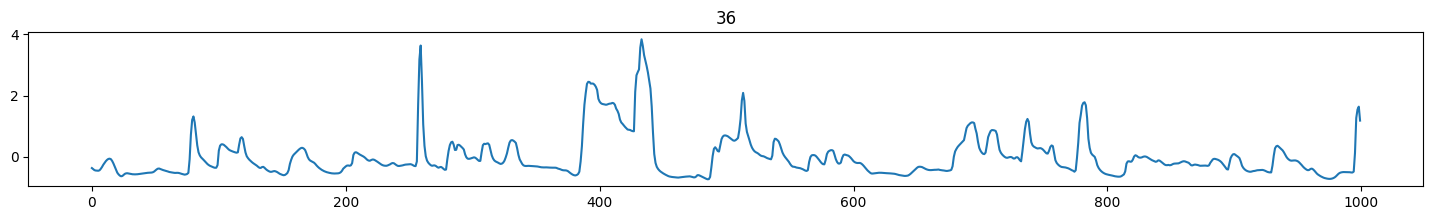

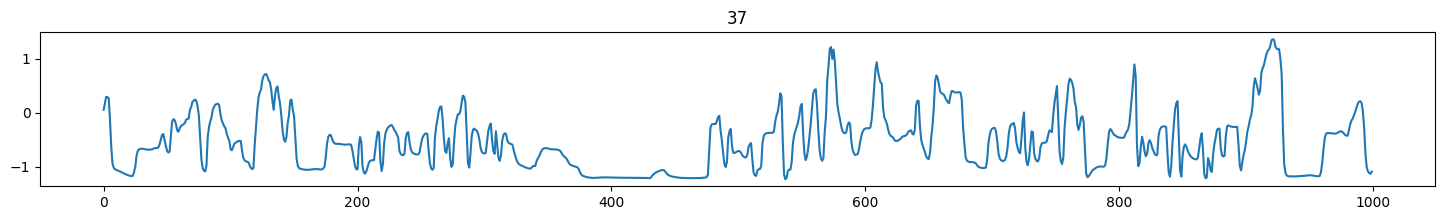

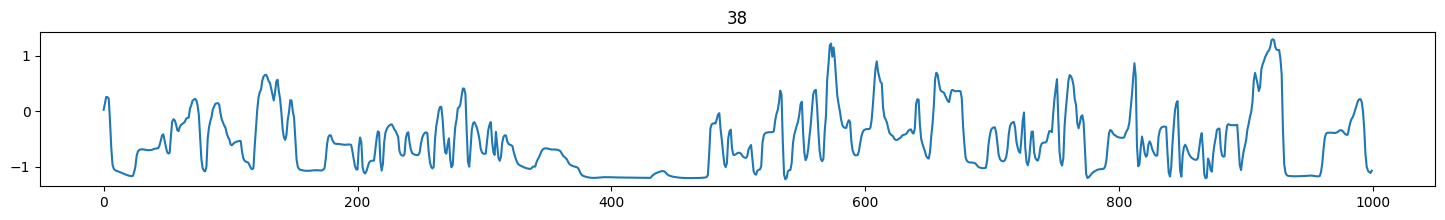

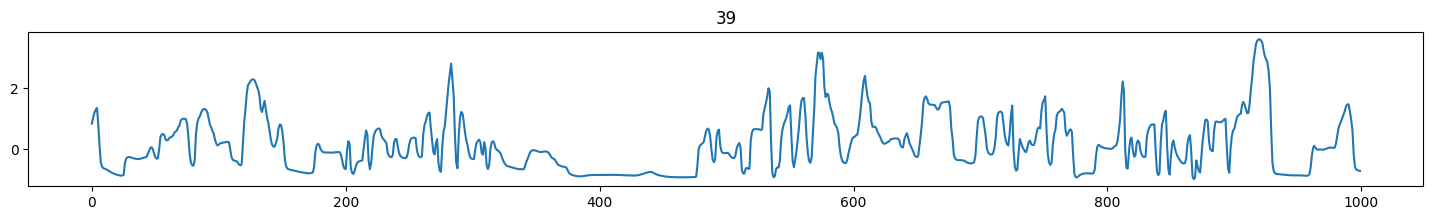

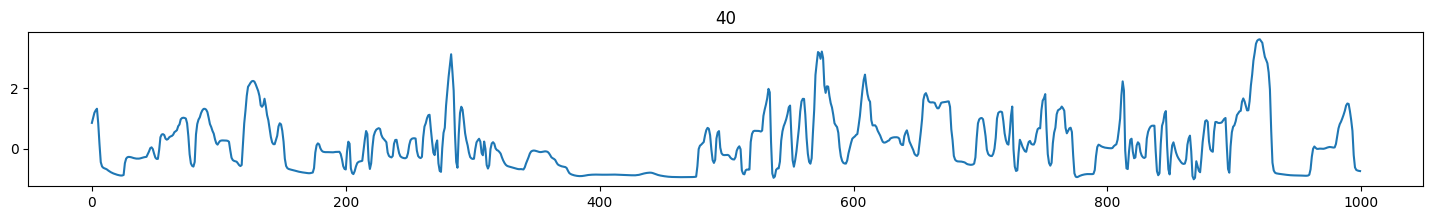

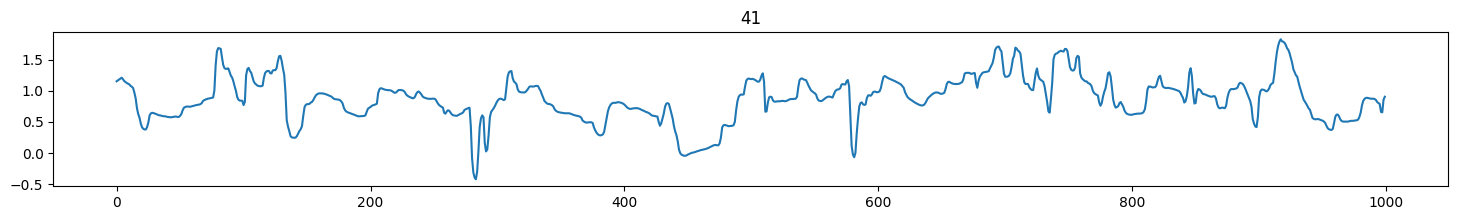

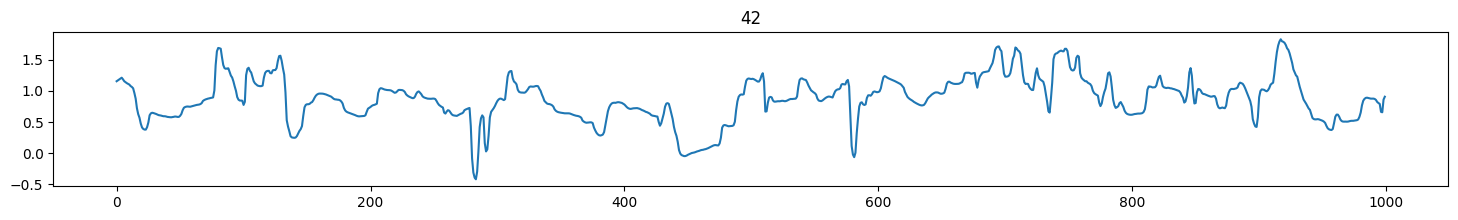

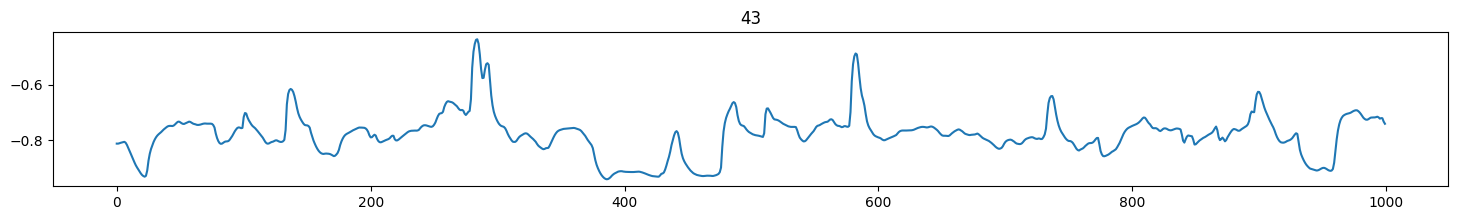

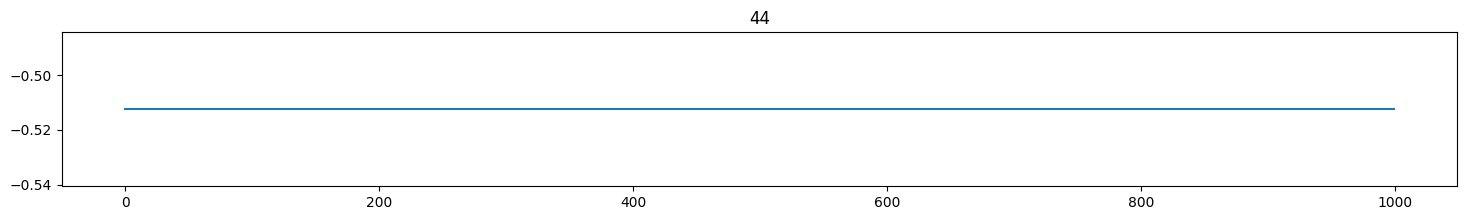

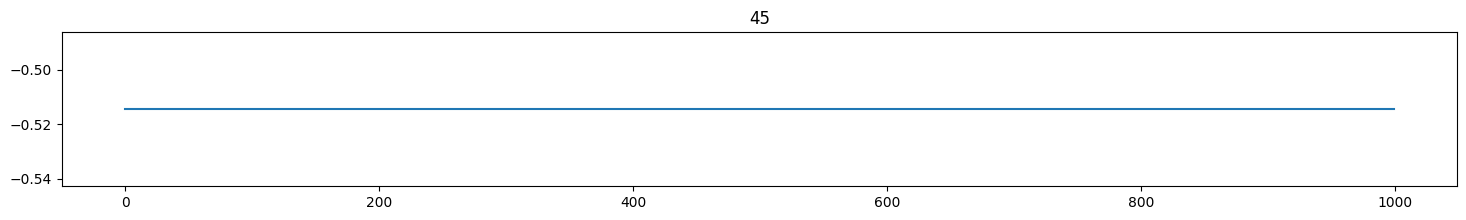

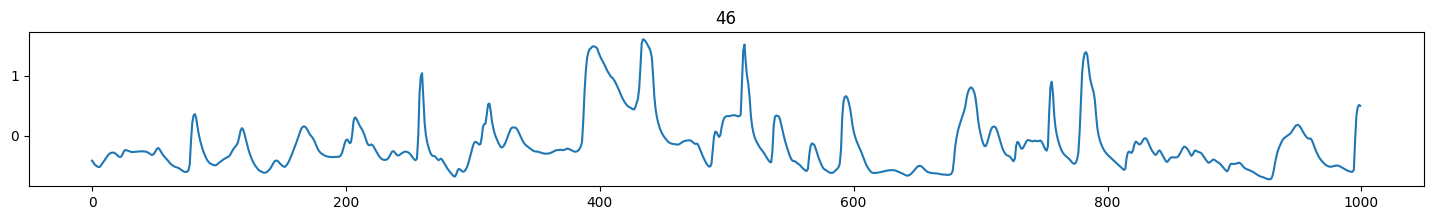

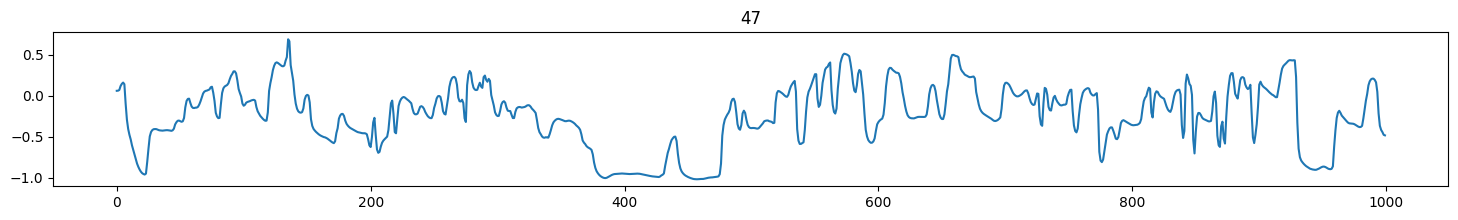

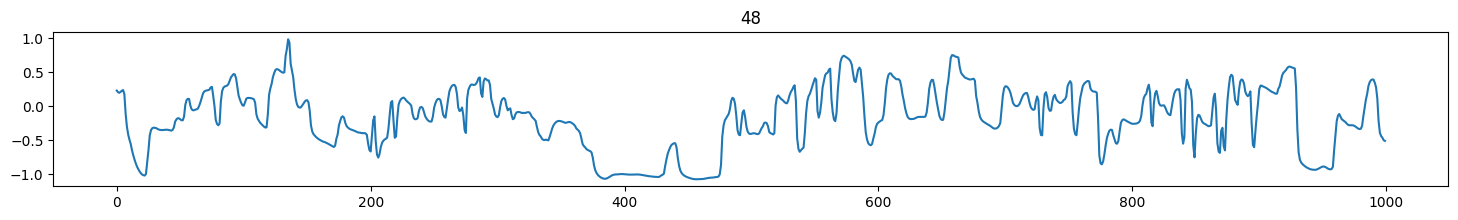

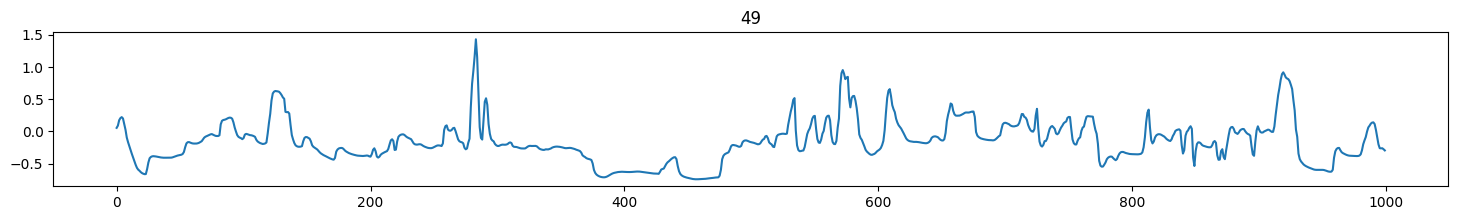

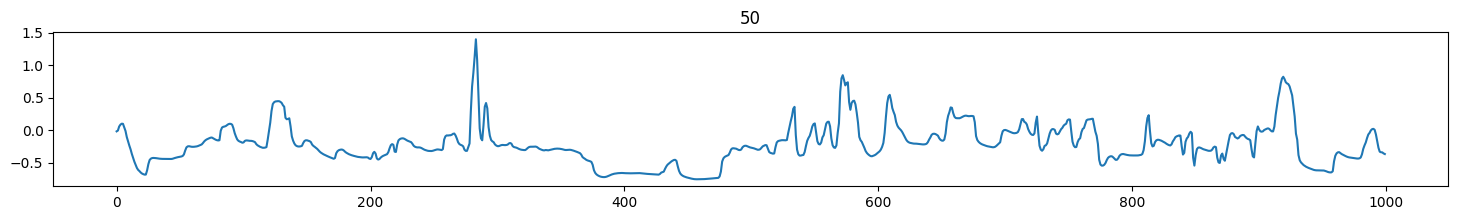

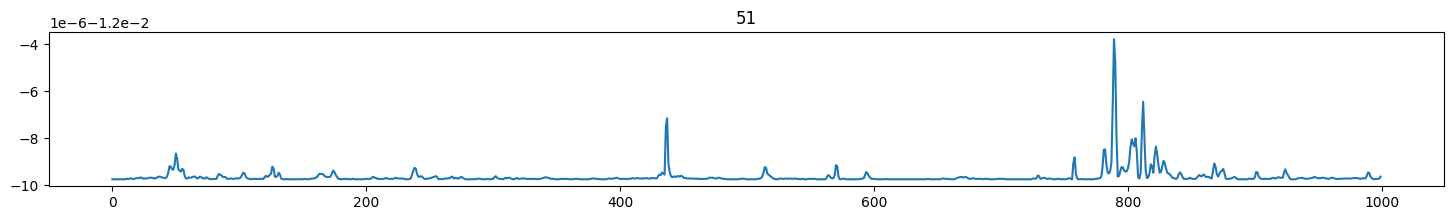

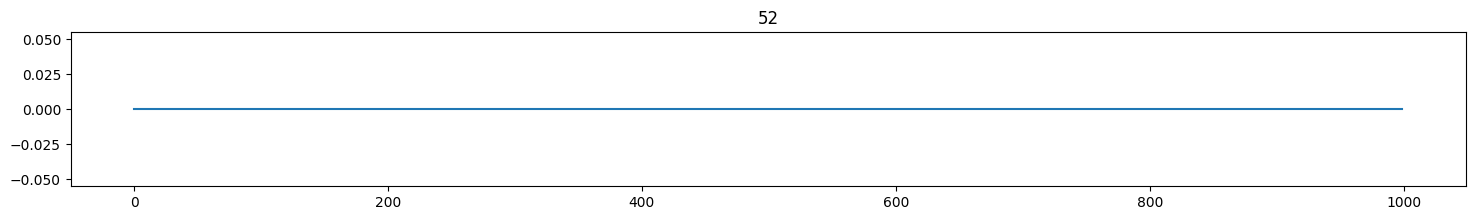

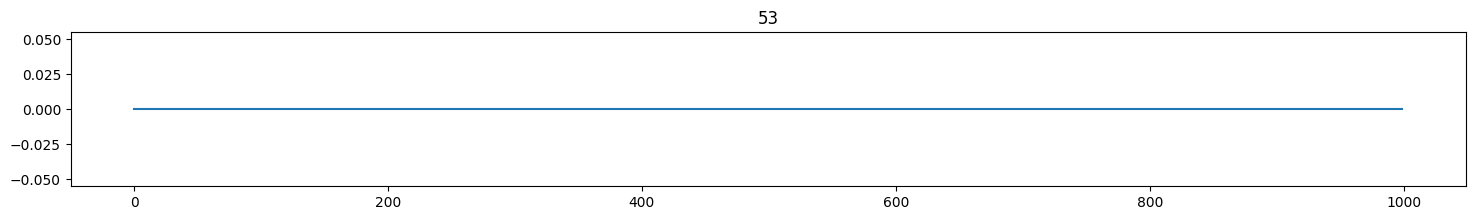

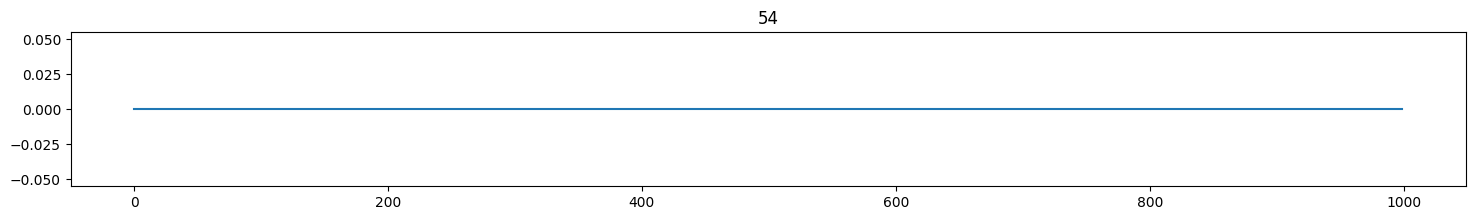

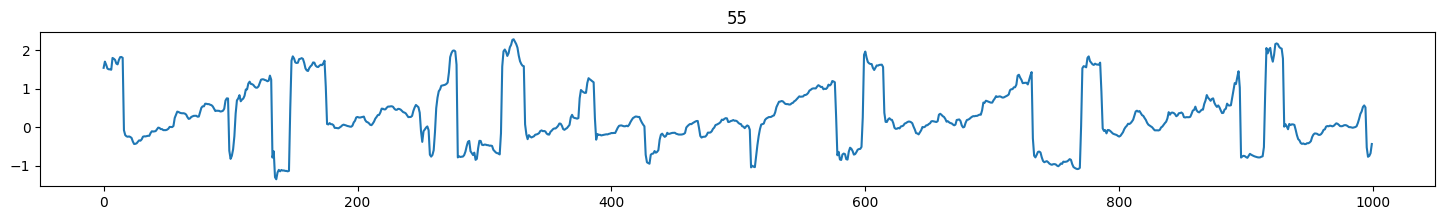

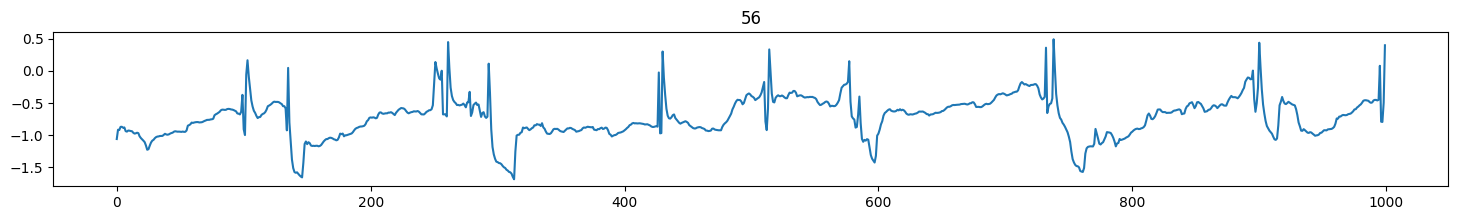

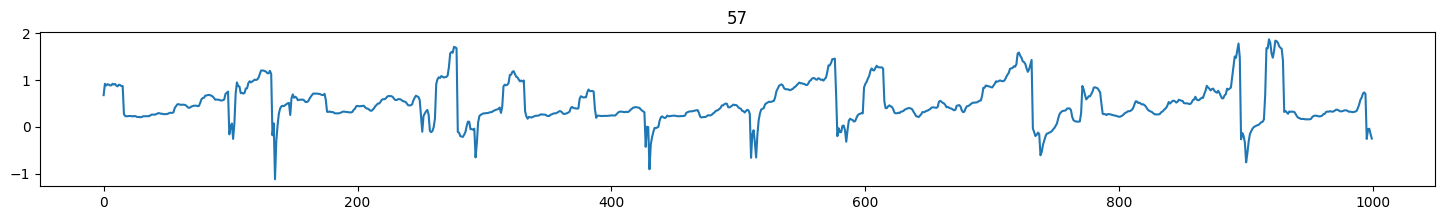

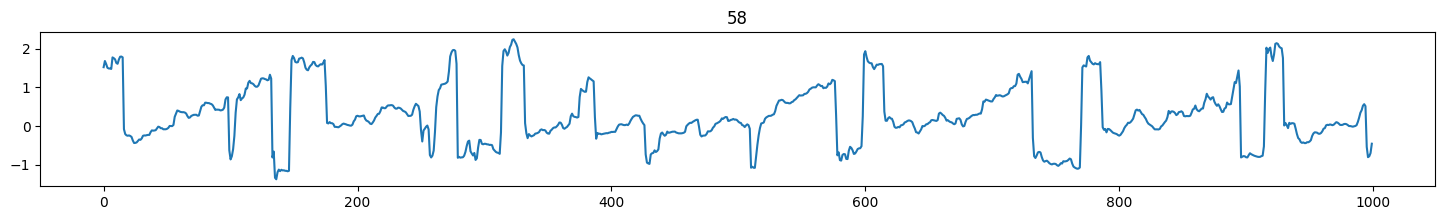

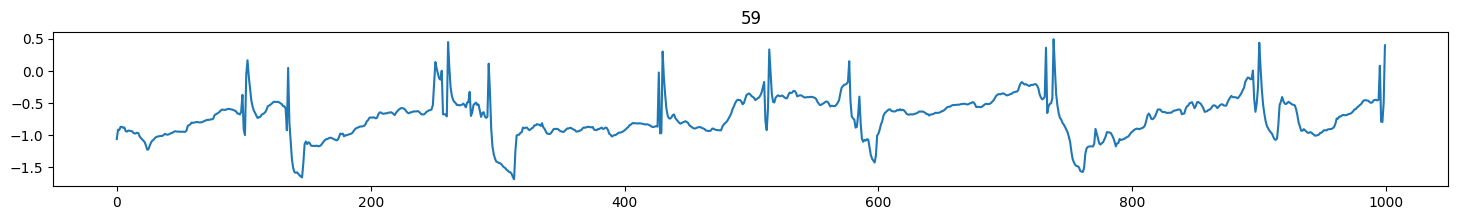

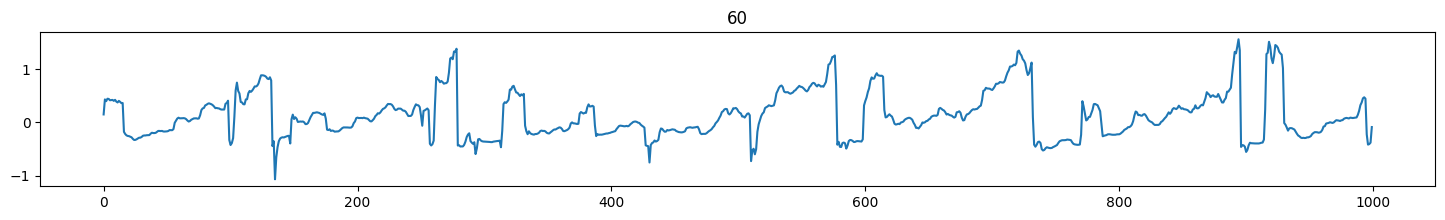

In [8]:
for i in range(61):
    plt.figure(figsize=[18, 2])
    plt.title(str(i))
    plt.plot(blendshapes_norm[1000:2000, i])
    plt.show()
